In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../")
from models.hd_regression_model import HDRegressionModel
from models.ld_regression_model import LDRegressionModel
from sampling.least_squares_sampler import LeastSquaresSampler
from sampling.embedding_functions import linear
from sampling.rate_schedulers import flat, stepped_lr, cosine_annealing

sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('../data/synthetic_data.csv').to_numpy()
d = data.shape[1] - 1
n = data.shape[0]
y = data[:n,d]
X = data[:n,:d]

In [3]:
var_observation = 1
var_prior = 1
A = np.linalg.inv(np.diag(np.full(d, var_prior)))
model = HDRegressionModel(X, y, np.full(n, var_observation), A, linear)
ld_model = LDRegressionModel(X, y, np.full(len(X), var_observation), A, linear)

In [4]:
ls_sampler = LeastSquaresSampler(model, 750, np.zeros(d))

In [6]:
# Investigate the error decay across different learning rates
n_iters = 10000
N = 10
rates = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5]
samples = np.zeros((N,d))
trueSamples = np.zeros((N,d))
diffs = np.zeros((N, n_iters))
errors = np.zeros((N, n_iters))
for i, r in enumerate(rates):
    print("i = {}, rate = {}".format(i, r))
    samples[i], (debug) = ls_sampler.sample(rate=r, threshold=0, max_iters=n_iters, debug=True, scheduler=flat)
    diffs[i,:], errors[i,:], trueSamples[i] = debug[0], debug[1], debug[2]

i = 0, rate = 1e-07
Starting LS sampling, momentum=None, beta=None, rate=1e-07, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 44/10000 [00:00<00:22, 438.91it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 3.2704663276672366e-05, average Phi generation time = 2.625415325164795e-05, average compute time = 0.0002264820098876953
COMPLETE: iters = 0, error = 0.26379935458407167, norm_grad = 0.0, rate = 1e-07


100%|██████████| 10000/10000 [00:25<00:00, 391.63it/s]


i = 1, rate = 5e-07
Starting LS sampling, momentum=None, beta=None, rate=5e-07, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 41/10000 [00:00<00:24, 408.09it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 5e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0002729939699172974, average Phi generation time = 0.0002436413526535034, average compute time = 0.0022670249462127686
COMPLETE: iters = 0, error = 0.28007336996923027, norm_grad = 0.0, rate = 5e-07


100%|██████████| 10000/10000 [00:21<00:00, 467.59it/s]


i = 2, rate = 1e-06
Starting LS sampling, momentum=None, beta=None, rate=1e-06, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 46/10000 [00:00<00:21, 459.34it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0005111744165420532, average Phi generation time = 0.00045164971351623534, average compute time = 0.003909927415847779
COMPLETE: iters = 0, error = 0.23712151726122804, norm_grad = 0.0, rate = 1e-06


100%|██████████| 10000/10000 [00:21<00:00, 470.66it/s]


i = 3, rate = 5e-06
Starting LS sampling, momentum=None, beta=None, rate=5e-06, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 46/10000 [00:00<00:21, 456.92it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 5e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0007490515947341919, average Phi generation time = 0.000659436583518982, average compute time = 0.005540158104896545
COMPLETE: iters = 0, error = 0.26214771915057034, norm_grad = 0.0, rate = 5e-06


100%|██████████| 10000/10000 [00:21<00:00, 469.17it/s]


i = 4, rate = 1e-05
Starting LS sampling, momentum=None, beta=None, rate=1e-05, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 45/10000 [00:00<00:22, 448.71it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0009874433040618896, average Phi generation time = 0.0008682061672210693, average compute time = 0.007175484848022461
COMPLETE: iters = 0, error = 0.2543933549605803, norm_grad = 0.0, rate = 1e-05


100%|██████████| 10000/10000 [00:21<00:00, 469.61it/s]


i = 5, rate = 5e-05
Starting LS sampling, momentum=None, beta=None, rate=5e-05, max_iters=10000, scheduler=<function flat at 0x7f183a57ad30>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 47/10000 [00:00<00:21, 460.44it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 5e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0012258602142333984, average Phi generation time = 0.0010769047021865845, average compute time = 0.008808867001533507
COMPLETE: iters = 0, error = 0.25150677693474904, norm_grad = 0.0, rate = 5e-05


100%|██████████| 10000/10000 [00:21<00:00, 468.83it/s]


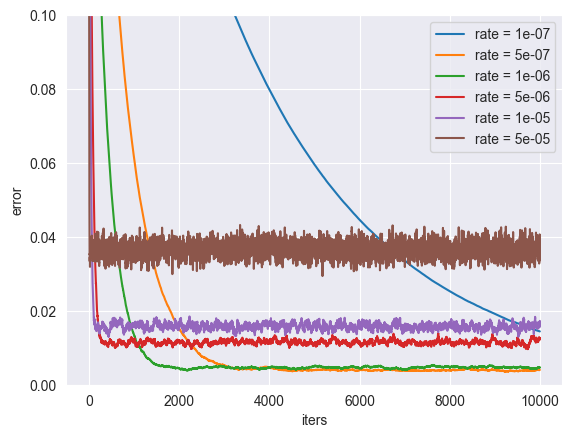

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots()
for i, r in enumerate(rates):
    ax.plot(errors[i], label='rate = {}'.format(np.round(r, int(np.abs(np.floor(np.log10(np.abs(r))))))))
ax.legend()
ax.set_xlabel('iters')
ax.set_ylabel('error')
ax.set_ylim(0,0.1)
plt.rcParams.update({'font.size': 16})

In [5]:
new_rates = np.logspace(-7, -5, num=10, base=10)
iters = 5000
samples = np.zeros((len(new_rates),d))
trueSamples = np.zeros((len(new_rates),d))
diffs = np.zeros((len(new_rates), iters))
errors = np.zeros((len(new_rates), iters))
for i, r in enumerate(new_rates):
    print("i = {}, rate = {}".format(i, r))
    samples[i], (debug) = ls_sampler.sample(rate=r, threshold=0, max_iters=iters, debug=True, scheduler=flat)
    diffs[i,:], errors[i,:], trueSamples[i] = debug[0], debug[1], debug[2]

i = 0, rate = 1e-07
Starting LS sampling, momentum=None, beta=None, rate=1e-07, max_iters=5000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  1%|          | 47/5000 [00:00<00:10, 461.23it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.2566916995432418, norm_grad = 0.0, rate = 1e-07


100%|██████████| 5000/5000 [00:10<00:00, 461.36it/s]


i = 1, rate = 1.668100537200059e-07
Starting LS sampling, momentum=None, beta=None, rate=1.668100537200059e-07, max_iters=5000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  1%|          | 48/5000 [00:00<00:10, 472.56it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1.668100537200059e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00011914606094360352, average Phi generation time = 0.00010399148464202881, average compute time = 0.000836481761932373
COMPLETE: iters = 0, error = 0.26784771171549765, norm_grad = 0.0, rate = 1.668100537200059e-07


100%|██████████| 5000/5000 [00:10<00:00, 474.07it/s]


i = 2, rate = 2.782559402207126e-07
Starting LS sampling, momentum=None, beta=None, rate=2.782559402207126e-07, max_iters=5000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  1%|          | 48/5000 [00:00<00:10, 471.58it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2.782559402207126e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00023805773258209228, average Phi generation time = 0.00020636932849884033, average compute time = 0.0016462990522384644
COMPLETE: iters = 0, error = 0.2379586899766642, norm_grad = 0.0, rate = 2.782559402207126e-07


100%|██████████| 5000/5000 [00:10<00:00, 476.04it/s]


i = 3, rate = 4.641588833612782e-07
Starting LS sampling, momentum=None, beta=None, rate=4.641588833612782e-07, max_iters=5000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  1%|          | 47/5000 [00:00<00:10, 461.19it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 4.641588833612782e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0003570023775100708, average Phi generation time = 0.0003088771104812622, average compute time = 0.002451638579368591
COMPLETE: iters = 0, error = 0.2530165494762037, norm_grad = 0.0, rate = 4.641588833612782e-07


100%|██████████| 5000/5000 [00:10<00:00, 474.56it/s]


i = 4, rate = 7.742636826811278e-07
Starting LS sampling, momentum=None, beta=None, rate=7.742636826811278e-07, max_iters=5000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  1%|          | 47/5000 [00:00<00:10, 468.17it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 7.742636826811278e-07
INFO: average gradient time = 0.0
INFO: average subsample time = 0.00047595319747924806, average Phi generation time = 0.000412467622756958, average compute time = 0.0032591760873794556
COMPLETE: iters = 0, error = 0.27795259225720415, norm_grad = 0.0, rate = 7.742636826811278e-07


 75%|███████▌  | 3762/5000 [00:07<00:02, 474.09it/s]


KeyboardInterrupt: 

In [ ]:
convergence_value = np.zeros(len(new_rates))
convergence_iter = np.zeros(len(new_rates))
for i in range(len(new_rates)):
    convergence_value[i] = np.mean(errors[i,4000:])
    convergence_iter[i] = next(j for j,v in enumerate(errors[i]) if v < convergence_value[i])

Text(0.5, 0, 'rate')

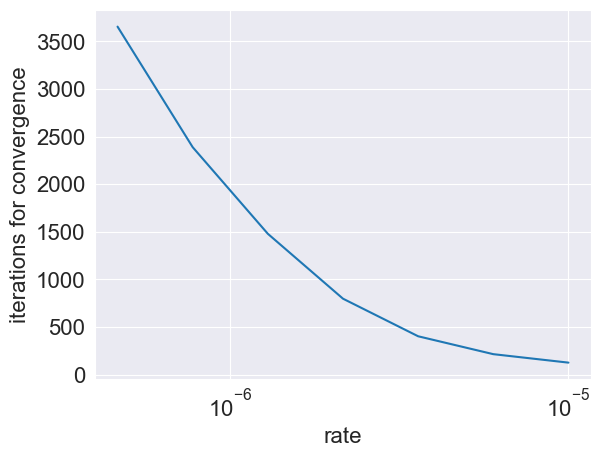

In [ ]:
fig, ax = plt.subplots()
ax.plot(new_rates[3:], convergence_iter[3:])
ax.set_xscale("log")
ax.set_ylabel("iterations for convergence")
ax.set_xlabel("rate")

Text(0.5, 0, 'rate')

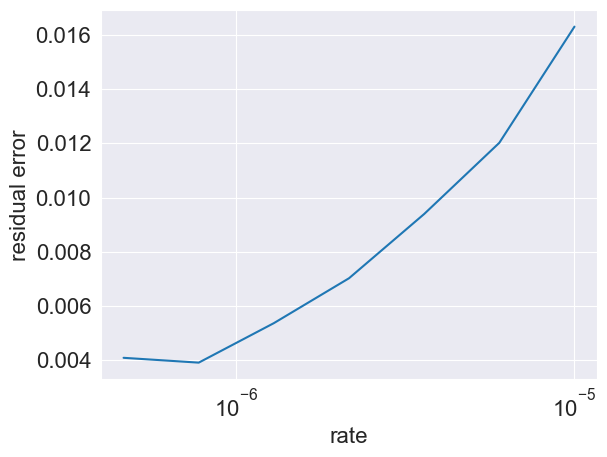

In [11]:
fig, ax = plt.subplots()
ax.plot(new_rates[3:], convergence_value[3:])
ax.set_xscale("log")
ax.set_ylabel("residual error")
ax.set_xlabel("rate")

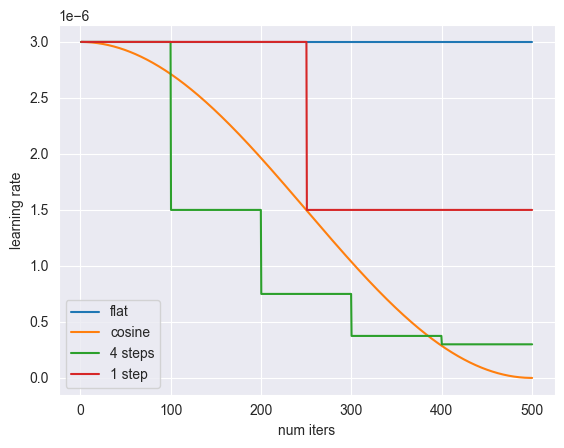

In [6]:
fig, ax = plt.subplots()
lrate_max = 3e-6
n_epochs = 500
x = np.linspace(1,n_epochs,num=1000)
ax.plot(x, np.array([flat(x, n_epochs, lrate_max) for x in x]), label='flat')
ax.plot(x, np.array([cosine_annealing(x, n_epochs, lrate_max) for x in x]), label='cosine')
ax.plot(x, np.array([stepped_lr(x, n_epochs, lrate_max, lr_decay=0.5, lr_step=n_epochs/5, lr_min=lrate_max/10) for x in x]), label='4 steps')
ax.plot(x, np.array([stepped_lr(x, n_epochs, lrate_max, lr_decay=0.5, lr_step=(n_epochs+1)/2, lr_min=lrate_max/10) for x in x]), label='1 step')
ax.legend()
ax.set_xlabel('num iters')
ax.set_ylabel('learning rate')
plt.rcParams.update({'font.size': 14})

In [7]:
iters = 500

samples = np.zeros((4,d))
trueSamples = np.zeros((4,d))
diffs = np.zeros((4, iters))
errors = np.zeros((4, iters))

samples[0], (debug) = ls_sampler.sample(rate=3e-6, threshold=0, max_iters=iters, debug=True, scheduler=flat)
diffs[0,:], errors[0,:], trueSamples[0] = debug[0], debug[1], debug[2]

samples[1], (debug) = ls_sampler.sample(rate=3e-6, threshold=0, max_iters=iters, debug=True, scheduler=cosine_annealing)
diffs[1,:], errors[1,:], trueSamples[1] = debug[1], debug[1], debug[2]

samples[2], (debug) = ls_sampler.sample(rate=3e-6, threshold=0, max_iters=iters, debug=True, scheduler=stepped_lr, lr_decay=0.5, lr_step=iters/5, lr_min=0)
diffs[2,:], errors[2,:], trueSamples[1] = debug[1], debug[1], debug[2]

samples[3], (debug) = ls_sampler.sample(rate=3e-6, threshold=0, max_iters=iters, debug=True, scheduler=stepped_lr, lr_decay=0.5, lr_step=(iters+1)/2, lr_min=0)
diffs[3,:], errors[3,:], trueSamples[1] = debug[1], debug[1], debug[2]

Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=500, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


 10%|▉         | 48/500 [00:00<00:00, 472.52it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0005655018091201782, average Phi generation time = 0.0004899473905563354, average compute time = 0.003867529034614563
COMPLETE: iters = 0, error = 0.25897009705077045, norm_grad = 0.0, rate = 3e-06


100%|██████████| 500/500 [00:01<00:00, 475.23it/s]


Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=500, scheduler=<function cosine_annealing at 0x7f9cac051820>
Computing Epsilon...
Computing true sample
Computing regulariser...


  9%|▉         | 47/500 [00:00<00:00, 461.12it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0005774141788482667, average Phi generation time = 0.0005003530979156494, average compute time = 0.003948008131980896
COMPLETE: iters = 0, error = 0.27760788248749174, norm_grad = 0.0, rate = 3e-06


100%|██████████| 500/500 [00:01<00:00, 475.42it/s]


Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=500, scheduler=<function stepped_lr at 0x7f9cac051790>
Computing Epsilon...
Computing true sample
Computing regulariser...


  9%|▉         | 46/500 [00:00<00:00, 454.97it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0005893272638320923, average Phi generation time = 0.0005107836961746215, average compute time = 0.004028257298469544
COMPLETE: iters = 0, error = 0.26315324305265847, norm_grad = 0.0, rate = 3e-06


100%|██████████| 500/500 [00:01<00:00, 473.18it/s]


Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=500, scheduler=<function stepped_lr at 0x7f9cac051790>
Computing Epsilon...
Computing true sample
Computing regulariser...


  9%|▉         | 46/500 [00:00<00:00, 457.26it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0006012213230133056, average Phi generation time = 0.0005212031126022339, average compute time = 0.004108537864685059
COMPLETE: iters = 0, error = 0.25381743301886767, norm_grad = 0.0, rate = 3e-06


100%|██████████| 500/500 [00:01<00:00, 465.55it/s]


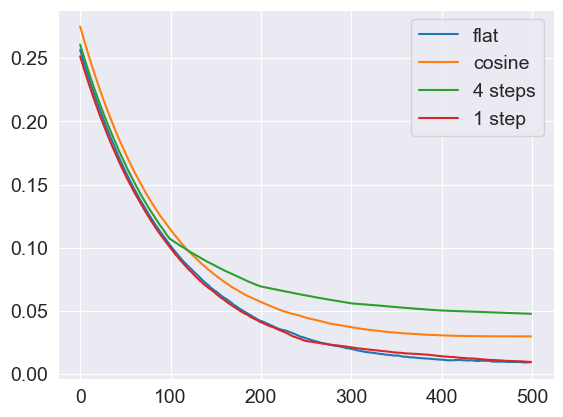

In [9]:
fig, ax = plt.subplots()
labels = ['flat', 'cosine', '4 steps', '1 step']
for i in range(4):
    ax.plot(errors[i,:], label=labels[i])
ax.legend()

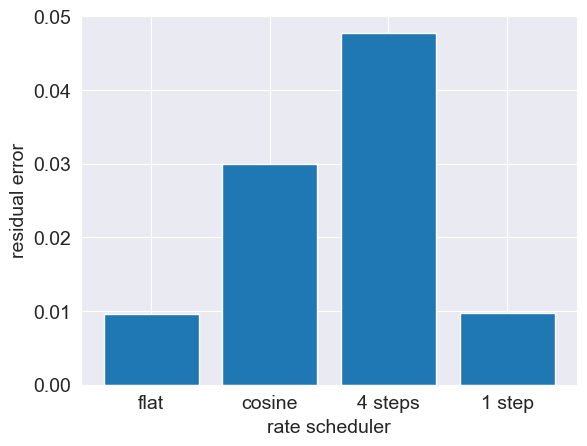

In [10]:
resid_errors = errors[:,-1]
fig, ax = plt.subplots()

ax.bar(labels, resid_errors)
ax.set_ylabel('residual error')
ax.set_xlabel('rate scheduler')
plt.rcParams.update({'font.size': 20})

In [14]:
batch_sizes = np.linspace(100, 2100, num=20)
times = np.zeros(20)
iters = 100000
for i, b in enumerate(batch_sizes[3:]):
    print("batch size = {}".format(b))
    ls_sampler = LeastSquaresSampler(model, b, np.zeros(d))
    sample, (debug) = ls_sampler.sample(rate=3e-6, threshold=0, max_iters=iters, debug=True, scheduler=flat, time=True, timer_error_threshold=0.01)
    times[i] = debug[3]
times[np.where(np.isnan(times))] = 0

batch size = 415.7894736842105
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 72/100000 [00:00<02:19, 718.20it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.2488188333666972, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10132/100000 [00:13<01:58, 757.64it/s]

INFO: iters = 10000, norm_z = 0.24720110760021105, diff = 559.9861144375733, rate = 3e-06
INFO: average gradient time = 0.0012868096351623536
INFO: average subsample time = 0.00023816120624542235, average Phi generation time = 9.663975238800049e-05, average compute time = 0.0009487386703491211
COMPLETE: iters = 10000, error = 0.011222046344374128, norm_grad = 559.9861144375733, rate = 3e-06


 20%|██        | 20127/100000 [00:26<01:45, 758.52it/s]

INFO: iters = 20000, norm_z = 0.24926325095005417, diff = 501.711862160459, rate = 3e-06
INFO: average gradient time = 0.0025680058002471922
INFO: average subsample time = 0.0004762223958969116, average Phi generation time = 0.00019314703941345214, average compute time = 0.0018920769929885865
COMPLETE: iters = 20000, error = 0.011356942131812946, norm_grad = 501.711862160459, rate = 3e-06


 30%|███       | 30139/100000 [00:39<01:32, 757.94it/s]

INFO: iters = 30000, norm_z = 0.249510881508333, diff = 599.0508262431897, rate = 3e-06
INFO: average gradient time = 0.0038495885610580443
INFO: average subsample time = 0.0007143321752548218, average Phi generation time = 0.0002896249532699585, average compute time = 0.0028357898473739622
COMPLETE: iters = 30000, error = 0.011296339178700439, norm_grad = 599.0508262431897, rate = 3e-06


 40%|████      | 40125/100000 [00:53<01:19, 757.29it/s]

INFO: iters = 40000, norm_z = 0.2489158760859763, diff = 513.0533492762092, rate = 3e-06
INFO: average gradient time = 0.0051326193571090695
INFO: average subsample time = 0.0009524521350860595, average Phi generation time = 0.00038600914478302003, average compute time = 0.0037810418128967284
COMPLETE: iters = 40000, error = 0.010676577757059845, norm_grad = 513.0533492762092, rate = 3e-06


 50%|█████     | 50090/100000 [01:06<01:06, 754.59it/s]

INFO: iters = 50000, norm_z = 0.2505489498381493, diff = 484.56483384681155, rate = 3e-06
INFO: average gradient time = 0.00641677372455597
INFO: average subsample time = 0.0011907546281814576, average Phi generation time = 0.00048291149139404295, average compute time = 0.004726653099060059
COMPLETE: iters = 50000, error = 0.01092017370561944, norm_grad = 484.56483384681155, rate = 3e-06


 60%|██████    | 60097/100000 [01:19<00:53, 752.36it/s]

INFO: iters = 60000, norm_z = 0.2502389521602996, diff = 517.4179407381845, rate = 3e-06
INFO: average gradient time = 0.007714676690101624
INFO: average subsample time = 0.0014293498277664185, average Phi generation time = 0.0005794991254806518, average compute time = 0.0056860226392745974
COMPLETE: iters = 60000, error = 0.011670158619029031, norm_grad = 517.4179407381845, rate = 3e-06


 70%|███████   | 70078/100000 [01:33<00:42, 704.94it/s]

INFO: iters = 70000, norm_z = 0.24893336594492166, diff = 510.0083695807898, rate = 3e-06
INFO: average gradient time = 0.009023261690139771
INFO: average subsample time = 0.001667510485649109, average Phi generation time = 0.0006762962579727172, average compute time = 0.00665637640953064
COMPLETE: iters = 70000, error = 0.011499952955357632, norm_grad = 510.0083695807898, rate = 3e-06


 80%|████████  | 80112/100000 [01:47<00:33, 597.95it/s]

INFO: iters = 80000, norm_z = 0.2503519712232896, diff = 570.3330746482424, rate = 3e-06
INFO: average gradient time = 0.010411249136924743
INFO: average subsample time = 0.0019060518980026245, average Phi generation time = 0.0007758837938308716, average compute time = 0.007702919459342957
COMPLETE: iters = 80000, error = 0.010727271484004436, norm_grad = 570.3330746482424, rate = 3e-06


 90%|█████████ | 90047/100000 [02:02<00:13, 730.55it/s]

INFO: iters = 90000, norm_z = 0.25041902947274397, diff = 525.7607075097569, rate = 3e-06
INFO: average gradient time = 0.011894964909553527
INFO: average subsample time = 0.002145983099937439, average Phi generation time = 0.0008846902847290039, average compute time = 0.008834550595283508
COMPLETE: iters = 90000, error = 0.011414286809313239, norm_grad = 525.7607075097569, rate = 3e-06


100%|██████████| 100000/100000 [02:18<00:00, 722.68it/s]


batch size = 521.0526315789473
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 41/100000 [00:00<04:07, 403.51it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24979928041566998, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10089/100000 [00:23<02:59, 501.06it/s]

INFO: iters = 10000, norm_z = 0.2501402247175666, diff = 488.95958170021066, rate = 3e-06
INFO: average gradient time = 0.0023304057121276856
INFO: average subsample time = 0.000241473650932312, average Phi generation time = 0.00015511236190795898, average compute time = 0.0019301117420196534
COMPLETE: iters = 10000, error = 0.010719788844391261, norm_grad = 488.95958170021066, rate = 3e-06


 20%|██        | 20116/100000 [00:43<02:18, 578.46it/s]

INFO: iters = 20000, norm_z = 0.24860951504477335, diff = 488.15742491744754, rate = 3e-06
INFO: average gradient time = 0.004228425574302673
INFO: average subsample time = 0.00048219354152679444, average Phi generation time = 0.0003001224756240845, average compute time = 0.0034388613224029542
COMPLETE: iters = 20000, error = 0.010043132663401943, norm_grad = 488.15742491744754, rate = 3e-06


 30%|███       | 30112/100000 [01:01<02:01, 575.20it/s]

INFO: iters = 30000, norm_z = 0.2503728316705999, diff = 469.64325947832253, rate = 3e-06
INFO: average gradient time = 0.0059634380340576176
INFO: average subsample time = 0.0007212516784667969, average Phi generation time = 0.00044619107246398926, average compute time = 0.004785344767570495
COMPLETE: iters = 30000, error = 0.010155342905886955, norm_grad = 469.64325947832253, rate = 3e-06


 40%|████      | 40093/100000 [01:19<01:44, 571.95it/s]

INFO: iters = 40000, norm_z = 0.2500027619089697, diff = 453.84163506205095, rate = 3e-06
INFO: average gradient time = 0.007783248138427734
INFO: average subsample time = 0.0009609608173370361, average Phi generation time = 0.0005803708076477051, average compute time = 0.006227852296829223
COMPLETE: iters = 40000, error = 0.010843187337990307, norm_grad = 453.84163506205095, rate = 3e-06


 50%|█████     | 50103/100000 [01:40<01:26, 577.42it/s]

INFO: iters = 50000, norm_z = 0.24954636252601728, diff = 500.06557828351697, rate = 3e-06
INFO: average gradient time = 0.009827967309951783
INFO: average subsample time = 0.0012009472608566284, average Phi generation time = 0.0007260166883468628, average compute time = 0.007883468675613403
COMPLETE: iters = 50000, error = 0.010672172781945544, norm_grad = 500.06557828351697, rate = 3e-06


 60%|██████    | 60097/100000 [01:59<01:21, 488.90it/s]

INFO: iters = 60000, norm_z = 0.24751656164941183, diff = 487.9861066279156, rate = 3e-06
INFO: average gradient time = 0.011678505873680115
INFO: average subsample time = 0.0014413971900939942, average Phi generation time = 0.0008718036651611328, average compute time = 0.00934428253173828
COMPLETE: iters = 60000, error = 0.011367907975591517, norm_grad = 487.9861066279156, rate = 3e-06


 70%|███████   | 70065/100000 [02:21<01:19, 374.20it/s]

INFO: iters = 70000, norm_z = 0.25026871235466613, diff = 474.9186002557531, rate = 3e-06
INFO: average gradient time = 0.013809545588493347
INFO: average subsample time = 0.0016818957567214965, average Phi generation time = 0.0010165786266326904, average compute time = 0.011086481428146363
COMPLETE: iters = 70000, error = 0.010953359806067752, norm_grad = 474.9186002557531, rate = 3e-06


 80%|████████  | 80054/100000 [02:41<01:03, 314.85it/s]

INFO: iters = 80000, norm_z = 0.25015100093748, diff = 452.3258791375978, rate = 3e-06
INFO: average gradient time = 0.015787376666069032
INFO: average subsample time = 0.001921175503730774, average Phi generation time = 0.0011629071712493896, average compute time = 0.01267522852420807
COMPLETE: iters = 80000, error = 0.009923386820965161, norm_grad = 452.3258791375978, rate = 3e-06


 90%|█████████ | 90105/100000 [03:01<00:17, 571.52it/s]

INFO: iters = 90000, norm_z = 0.24733910793556108, diff = 510.8712984641007, rate = 3e-06
INFO: average gradient time = 0.017720903587341307
INFO: average subsample time = 0.002161013913154602, average Phi generation time = 0.0013092991828918456, average compute time = 0.01421898682117462
COMPLETE: iters = 90000, error = 0.010318148760189667, norm_grad = 510.8712984641007, rate = 3e-06


100%|██████████| 100000/100000 [03:18<00:00, 502.83it/s]


batch size = 626.3157894736842
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 57/100000 [00:00<02:57, 562.49it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24684297478421052, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10105/100000 [00:17<02:38, 566.03it/s]

INFO: iters = 10000, norm_z = 0.24867898894969065, diff = 466.660378083295, rate = 3e-06
INFO: average gradient time = 0.0017191548109054566
INFO: average subsample time = 0.0002387425184249878, average Phi generation time = 0.00015416240692138673, average compute time = 0.0013228535652160644
COMPLETE: iters = 10000, error = 0.008692897022790589, norm_grad = 466.660378083295, rate = 3e-06


 20%|██        | 20088/100000 [00:35<02:21, 566.74it/s]

INFO: iters = 20000, norm_z = 0.24665328622126514, diff = 423.74614425934305, rate = 3e-06
INFO: average gradient time = 0.0034452857732772827
INFO: average subsample time = 0.0004774737596511841, average Phi generation time = 0.00030872411727905276, average compute time = 0.002652279710769653
COMPLETE: iters = 20000, error = 0.009585661309480426, norm_grad = 423.74614425934305, rate = 3e-06


 30%|███       | 30082/100000 [00:53<02:04, 562.41it/s]

INFO: iters = 30000, norm_z = 0.24514500768517453, diff = 388.9000101501998, rate = 3e-06
INFO: average gradient time = 0.005164861726760864
INFO: average subsample time = 0.0007162811994552613, average Phi generation time = 0.0004632535219192505, average compute time = 0.003975115871429444
COMPLETE: iters = 30000, error = 0.008815183632755196, norm_grad = 388.9000101501998, rate = 3e-06


 40%|████      | 40102/100000 [01:11<01:46, 562.70it/s]

INFO: iters = 40000, norm_z = 0.2464514364735371, diff = 395.3258103963636, rate = 3e-06
INFO: average gradient time = 0.006940837955474854
INFO: average subsample time = 0.0009550567388534546, average Phi generation time = 0.0006187119960784913, average compute time = 0.005353465533256531
COMPLETE: iters = 40000, error = 0.009437323004665906, norm_grad = 395.3258103963636, rate = 3e-06


 50%|█████     | 50065/100000 [01:29<01:48, 460.94it/s]

INFO: iters = 50000, norm_z = 0.24648545164590027, diff = 402.80404861283745, rate = 3e-06
INFO: average gradient time = 0.00869040434360504
INFO: average subsample time = 0.0011938431739807129, average Phi generation time = 0.0007747478008270263, average compute time = 0.006704805254936218
COMPLETE: iters = 50000, error = 0.00929024939556548, norm_grad = 402.80404861283745, rate = 3e-06


 60%|██████    | 60093/100000 [01:47<01:10, 566.47it/s]

INFO: iters = 60000, norm_z = 0.2475122316890533, diff = 433.89139421462244, rate = 3e-06
INFO: average gradient time = 0.010426586151123046
INFO: average subsample time = 0.0014326625347137452, average Phi generation time = 0.0009306262493133545, average compute time = 0.00804286139011383
COMPLETE: iters = 60000, error = 0.009626505550215157, norm_grad = 433.89139421462244, rate = 3e-06


 70%|███████   | 70067/100000 [02:04<00:52, 566.18it/s]

INFO: iters = 70000, norm_z = 0.24839068997525549, diff = 403.4618990299545, rate = 3e-06
INFO: average gradient time = 0.012152787327766418
INFO: average subsample time = 0.001671451473236084, average Phi generation time = 0.0010864800214767456, average compute time = 0.009370988488197327
COMPLETE: iters = 70000, error = 0.008999359343084008, norm_grad = 403.4618990299545, rate = 3e-06


 80%|████████  | 80099/100000 [02:22<00:35, 560.85it/s]

INFO: iters = 80000, norm_z = 0.24548399427899234, diff = 364.8969317819916, rate = 3e-06
INFO: average gradient time = 0.013877335786819458
INFO: average subsample time = 0.0019102241039276123, average Phi generation time = 0.0012420087814331055, average compute time = 0.010697799396514893
COMPLETE: iters = 80000, error = 0.008988521172099447, norm_grad = 364.8969317819916, rate = 3e-06


 90%|█████████ | 90055/100000 [02:46<00:22, 438.11it/s]

INFO: iters = 90000, norm_z = 0.2475780357475801, diff = 409.5891662591446, rate = 3e-06
INFO: average gradient time = 0.016244532179832457
INFO: average subsample time = 0.0021507344007492065, average Phi generation time = 0.0014168266534805298, average compute time = 0.012646156406402587
COMPLETE: iters = 90000, error = 0.008673881737721895, norm_grad = 409.5891662591446, rate = 3e-06


100%|██████████| 100000/100000 [03:08<00:00, 530.09it/s]


batch size = 731.578947368421
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 28/100000 [00:00<06:00, 277.62it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.25686025368426746, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10060/100000 [00:22<03:10, 471.21it/s]

INFO: iters = 10000, norm_z = 0.2564419287570885, diff = 369.7448529886273, rate = 3e-06
INFO: average gradient time = 0.0022363295078277586
INFO: average subsample time = 0.0002400038480758667, average Phi generation time = 0.00019979205131530762, average compute time = 0.0017929693460464477
COMPLETE: iters = 10000, error = 0.008209806438170009, norm_grad = 369.7448529886273, rate = 3e-06


 20%|██        | 20059/100000 [00:43<02:45, 484.30it/s]

INFO: iters = 20000, norm_z = 0.25776157718114506, diff = 379.5164330896821, rate = 3e-06
INFO: average gradient time = 0.004266797399520874
INFO: average subsample time = 0.00048023991584777835, average Phi generation time = 0.00038924317359924316, average compute time = 0.00339017972946167
COMPLETE: iters = 20000, error = 0.008800601019430398, norm_grad = 379.5164330896821, rate = 3e-06


 30%|███       | 30070/100000 [01:07<02:46, 420.75it/s]

INFO: iters = 30000, norm_z = 0.2570017212258518, diff = 367.91256132973473, rate = 3e-06
INFO: average gradient time = 0.006623034453392029
INFO: average subsample time = 0.000721069359779358, average Phi generation time = 0.0005893717288970947, average compute time = 0.005301726078987121
COMPLETE: iters = 30000, error = 0.00854111311277867, norm_grad = 367.91256132973473, rate = 3e-06


 40%|████      | 40064/100000 [01:30<02:03, 483.93it/s]

INFO: iters = 40000, norm_z = 0.25684296378273425, diff = 441.5211395134213, rate = 3e-06
INFO: average gradient time = 0.008873436164855957
INFO: average subsample time = 0.0009605841159820557, average Phi generation time = 0.000786233139038086, average compute time = 0.007112222576141357
COMPLETE: iters = 40000, error = 0.009418019557725699, norm_grad = 441.5211395134213, rate = 3e-06


 50%|█████     | 50086/100000 [01:51<01:44, 478.17it/s]

INFO: iters = 50000, norm_z = 0.25649574003491643, diff = 346.748225538091, rate = 3e-06
INFO: average gradient time = 0.010929748058319092
INFO: average subsample time = 0.0011992351770401001, average Phi generation time = 0.0009750503540039063, average compute time = 0.008737634539604187
COMPLETE: iters = 50000, error = 0.008320522848009534, norm_grad = 346.748225538091, rate = 3e-06


 60%|██████    | 60051/100000 [02:12<01:21, 487.71it/s]

INFO: iters = 60000, norm_z = 0.2572384980706037, diff = 384.7841945484978, rate = 3e-06
INFO: average gradient time = 0.01294029996395111
INFO: average subsample time = 0.0014376041889190673, average Phi generation time = 0.0011633636236190795, average compute time = 0.010318086004257203
COMPLETE: iters = 60000, error = 0.009452135075153275, norm_grad = 384.7841945484978, rate = 3e-06


 70%|███████   | 70066/100000 [02:33<01:01, 487.50it/s]

INFO: iters = 70000, norm_z = 0.25609099638661215, diff = 420.9227144175139, rate = 3e-06
INFO: average gradient time = 0.01495290002822876
INFO: average subsample time = 0.001675906491279602, average Phi generation time = 0.0013520480394363403, average compute time = 0.01190029366016388
COMPLETE: iters = 70000, error = 0.008643697737955999, norm_grad = 420.9227144175139, rate = 3e-06


 80%|████████  | 80090/100000 [02:53<00:40, 490.84it/s]

INFO: iters = 80000, norm_z = 0.2574132835901654, diff = 442.1973538379829, rate = 3e-06
INFO: average gradient time = 0.01692174072265625
INFO: average subsample time = 0.0019147721529006957, average Phi generation time = 0.0015405121803283692, average compute time = 0.013438364338874817
COMPLETE: iters = 80000, error = 0.008897010365372307, norm_grad = 442.1973538379829, rate = 3e-06


 90%|█████████ | 90052/100000 [03:13<00:20, 486.72it/s]

INFO: iters = 90000, norm_z = 0.25597896652097873, diff = 439.52831232375314, rate = 3e-06
INFO: average gradient time = 0.018922580051422118
INFO: average subsample time = 0.0021533416271209715, average Phi generation time = 0.0017286368370056152, average compute time = 0.015009029746055603
COMPLETE: iters = 90000, error = 0.009538083282646907, norm_grad = 439.52831232375314, rate = 3e-06


100%|██████████| 100000/100000 [03:34<00:00, 466.84it/s]


batch size = 836.8421052631578
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 39/100000 [00:00<04:16, 389.11it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.2542061173116085, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10042/100000 [00:24<03:41, 406.18it/s]

INFO: iters = 10000, norm_z = 0.2554355672299155, diff = 370.0265044768025, rate = 3e-06
INFO: average gradient time = 0.0024214955091476443
INFO: average subsample time = 0.00023901925086975098, average Phi generation time = 0.00022249226570129394, average compute time = 0.0019564702033996583
COMPLETE: iters = 10000, error = 0.008414472934257532, norm_grad = 370.0265044768025, rate = 3e-06


 20%|██        | 20045/100000 [00:49<03:17, 405.38it/s]

INFO: iters = 20000, norm_z = 0.25433740151358275, diff = 398.0325564719026, rate = 3e-06
INFO: average gradient time = 0.004855677390098572
INFO: average subsample time = 0.0004780233383178711, average Phi generation time = 0.0004460695266723633, average compute time = 0.003924553632736206
COMPLETE: iters = 20000, error = 0.008098900251307562, norm_grad = 398.0325564719026, rate = 3e-06


 30%|███       | 30049/100000 [01:14<02:52, 406.22it/s]

INFO: iters = 30000, norm_z = 0.2539604012472446, diff = 355.30172493270726, rate = 3e-06
INFO: average gradient time = 0.007277460145950317
INFO: average subsample time = 0.0007170361518859863, average Phi generation time = 0.0006696242809295655, average compute time = 0.005880253076553345
COMPLETE: iters = 30000, error = 0.008530152302206512, norm_grad = 355.30172493270726, rate = 3e-06


 40%|████      | 40051/100000 [01:39<02:27, 405.45it/s]

INFO: iters = 40000, norm_z = 0.25276920728340846, diff = 325.3857628629839, rate = 3e-06
INFO: average gradient time = 0.009705099725723266
INFO: average subsample time = 0.0009560728788375855, average Phi generation time = 0.0008935798168182373, average compute time = 0.007841360282897948
COMPLETE: iters = 40000, error = 0.007864416001491709, norm_grad = 325.3857628629839, rate = 3e-06


 50%|█████     | 50052/100000 [02:03<02:03, 405.68it/s]

INFO: iters = 50000, norm_z = 0.25454934940205737, diff = 351.5044962934109, rate = 3e-06
INFO: average gradient time = 0.01213093273639679
INFO: average subsample time = 0.001195278525352478, average Phi generation time = 0.0011182405471801757, average compute time = 0.009799756407737732
COMPLETE: iters = 50000, error = 0.007140946677935317, norm_grad = 351.5044962934109, rate = 3e-06


 60%|██████    | 60056/100000 [02:28<01:38, 405.08it/s]

INFO: iters = 60000, norm_z = 0.2533855408198674, diff = 381.34066195845963, rate = 3e-06
INFO: average gradient time = 0.01455232696533203
INFO: average subsample time = 0.001434382963180542, average Phi generation time = 0.0013420327186584474, average compute time = 0.011754732418060302
COMPLETE: iters = 60000, error = 0.007591478984182052, norm_grad = 381.34066195845963, rate = 3e-06


 70%|███████   | 70060/100000 [02:53<01:13, 405.60it/s]

INFO: iters = 70000, norm_z = 0.25444397276803726, diff = 363.0510780648406, rate = 3e-06
INFO: average gradient time = 0.016977002120018004
INFO: average subsample time = 0.0016735653638839721, average Phi generation time = 0.0015659767627716065, average compute time = 0.013712747120857238
COMPLETE: iters = 70000, error = 0.008724662783364784, norm_grad = 363.0510780648406, rate = 3e-06


 80%|████████  | 80063/100000 [03:18<00:49, 404.13it/s]

INFO: iters = 80000, norm_z = 0.25488533563880095, diff = 364.19718462269975, rate = 3e-06
INFO: average gradient time = 0.01940059549808502
INFO: average subsample time = 0.001912652611732483, average Phi generation time = 0.001789461612701416, average compute time = 0.015670258450508116
COMPLETE: iters = 80000, error = 0.008155529749920343, norm_grad = 364.19718462269975, rate = 3e-06


 90%|█████████ | 90067/100000 [03:42<00:24, 403.60it/s]

INFO: iters = 90000, norm_z = 0.25419658675872747, diff = 419.48681064349216, rate = 3e-06
INFO: average gradient time = 0.021826058340072632
INFO: average subsample time = 0.002151805758476257, average Phi generation time = 0.00201358642578125, average compute time = 0.01762889404296875
COMPLETE: iters = 90000, error = 0.008331285980726019, norm_grad = 419.48681064349216, rate = 3e-06


100%|██████████| 100000/100000 [04:07<00:00, 404.06it/s]


batch size = 942.1052631578947
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 36/100000 [00:00<04:37, 359.93it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.27626416272040516, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10037/100000 [00:27<04:11, 357.10it/s]

INFO: iters = 10000, norm_z = 0.27452894403654243, diff = 353.2677154149297, rate = 3e-06
INFO: average gradient time = 0.002727206778526306
INFO: average subsample time = 0.00023980867862701417, average Phi generation time = 0.0002636463165283203, average compute time = 0.0022201844453811647
COMPLETE: iters = 10000, error = 0.007908309490496396, norm_grad = 353.2677154149297, rate = 3e-06


 20%|██        | 20046/100000 [00:55<03:43, 357.13it/s]

INFO: iters = 20000, norm_z = 0.27620428047484186, diff = 373.2479022182354, rate = 3e-06
INFO: average gradient time = 0.005473866701126099
INFO: average subsample time = 0.0004812793493270874, average Phi generation time = 0.0005311200618743897, average compute time = 0.00445428204536438
COMPLETE: iters = 20000, error = 0.00808467317437002, norm_grad = 373.2479022182354, rate = 3e-06


 30%|███       | 30055/100000 [01:24<03:16, 356.69it/s]

INFO: iters = 30000, norm_z = 0.2764176981419054, diff = 328.3454502038194, rate = 3e-06
INFO: average gradient time = 0.008228387546539307
INFO: average subsample time = 0.0007229153394699096, average Phi generation time = 0.0007992189407348632, average compute time = 0.006695455408096313
COMPLETE: iters = 30000, error = 0.00797575530444192, norm_grad = 328.3454502038194, rate = 3e-06


 40%|████      | 40063/100000 [01:52<02:48, 356.46it/s]

INFO: iters = 40000, norm_z = 0.2763329885047419, diff = 355.8835108382005, rate = 3e-06
INFO: average gradient time = 0.010980014276504517
INFO: average subsample time = 0.0009645771741867065, average Phi generation time = 0.001068013620376587, average compute time = 0.00893299334049225
COMPLETE: iters = 40000, error = 0.008367117871460144, norm_grad = 355.8835108382005, rate = 3e-06


 50%|█████     | 50071/100000 [02:20<02:19, 357.05it/s]

INFO: iters = 50000, norm_z = 0.27738532011315065, diff = 389.8481747263564, rate = 3e-06
INFO: average gradient time = 0.013734447979927063
INFO: average subsample time = 0.0012058446407318115, average Phi generation time = 0.0013366504430770874, average compute time = 0.011173923468589782
COMPLETE: iters = 50000, error = 0.00830993611941975, norm_grad = 389.8481747263564, rate = 3e-06


 60%|██████    | 60044/100000 [02:48<01:52, 356.55it/s]

INFO: iters = 60000, norm_z = 0.27691108538324977, diff = 400.7473604039956, rate = 3e-06
INFO: average gradient time = 0.01648353805541992
INFO: average subsample time = 0.001446902370452881, average Phi generation time = 0.0016048989534378053, average compute time = 0.013410084128379822
COMPLETE: iters = 60000, error = 0.008295157813618318, norm_grad = 400.7473604039956, rate = 3e-06


 70%|███████   | 70052/100000 [03:19<01:31, 327.81it/s]

INFO: iters = 70000, norm_z = 0.27545377748293665, diff = 375.2799604947383, rate = 3e-06
INFO: average gradient time = 0.019506510376930238
INFO: average subsample time = 0.0016885406255722046, average Phi generation time = 0.0018848042964935304, average compute time = 0.015907775712013246
COMPLETE: iters = 70000, error = 0.00790692053638983, norm_grad = 375.2799604947383, rate = 3e-06


 80%|████████  | 80056/100000 [03:48<00:55, 357.19it/s]

INFO: iters = 80000, norm_z = 0.27621840755172056, diff = 368.5117050845098, rate = 3e-06
INFO: average gradient time = 0.022424934077262877
INFO: average subsample time = 0.0019290280103683472, average Phi generation time = 0.0021563305616378783, average compute time = 0.01831056306362152
COMPLETE: iters = 80000, error = 0.007761643439679631, norm_grad = 368.5117050845098, rate = 3e-06


 90%|█████████ | 90038/100000 [04:16<00:27, 356.48it/s]

INFO: iters = 90000, norm_z = 0.2763119503171547, diff = 362.3904867113063, rate = 3e-06
INFO: average gradient time = 0.02518097655773163
INFO: average subsample time = 0.0021704756498336793, average Phi generation time = 0.0024247939109802246, average compute time = 0.020553069615364076
COMPLETE: iters = 90000, error = 0.00832071548976067, norm_grad = 362.3904867113063, rate = 3e-06


100%|██████████| 100000/100000 [04:44<00:00, 351.08it/s]


batch size = 1047.3684210526317
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 33/100000 [00:00<05:10, 321.79it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24367481002753863, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10033/100000 [00:30<04:37, 323.86it/s]

INFO: iters = 10000, norm_z = 0.24440794802242846, diff = 328.44851707915507, rate = 3e-06
INFO: average gradient time = 0.003005099296569824
INFO: average subsample time = 0.00023999741077423097, average Phi generation time = 0.00030660426616668703, average compute time = 0.0024548746585845945
COMPLETE: iters = 10000, error = 0.006683707429881078, norm_grad = 328.44851707915507, rate = 3e-06


 20%|██        | 20032/100000 [01:01<04:06, 324.72it/s]

INFO: iters = 20000, norm_z = 0.243765418708213, diff = 318.0331800923283, rate = 3e-06
INFO: average gradient time = 0.006028908634185791
INFO: average subsample time = 0.0004809185028076172, average Phi generation time = 0.0006196501016616821, average compute time = 0.004921019077301025
COMPLETE: iters = 20000, error = 0.006252789518580687, norm_grad = 318.0331800923283, rate = 3e-06


 30%|███       | 30064/100000 [01:32<03:35, 324.83it/s]

INFO: iters = 30000, norm_z = 0.242533182581739, diff = 302.6636473761383, rate = 3e-06
INFO: average gradient time = 0.009055106496810914
INFO: average subsample time = 0.0007219504356384277, average Phi generation time = 0.0009332091569900512, average compute time = 0.007388919973373413
COMPLETE: iters = 30000, error = 0.006498202700206226, norm_grad = 302.6636473761383, rate = 3e-06


 40%|████      | 40063/100000 [02:03<03:08, 318.30it/s]

INFO: iters = 40000, norm_z = 0.24372190254569956, diff = 327.27026264418294, rate = 3e-06
INFO: average gradient time = 0.01208810636997223
INFO: average subsample time = 0.0009631699800491333, average Phi generation time = 0.0012476632356643678, average compute time = 0.009862523627281189
COMPLETE: iters = 40000, error = 0.0062831354172154874, norm_grad = 327.27026264418294, rate = 3e-06


 50%|█████     | 50060/100000 [02:34<02:34, 324.04it/s]

INFO: iters = 50000, norm_z = 0.24248502549996367, diff = 307.3234201821638, rate = 3e-06
INFO: average gradient time = 0.015116899609565734
INFO: average subsample time = 0.0012045997381210328, average Phi generation time = 0.0015625016927719117, average compute time = 0.012331331872940063
COMPLETE: iters = 50000, error = 0.007077237510278333, norm_grad = 307.3234201821638, rate = 3e-06


 60%|██████    | 60054/100000 [03:05<02:03, 322.83it/s]

INFO: iters = 60000, norm_z = 0.24295890840070883, diff = 335.9601524511651, rate = 3e-06
INFO: average gradient time = 0.0181746839761734
INFO: average subsample time = 0.0014460501194000243, average Phi generation time = 0.0018777404308319091, average compute time = 0.01482869644165039
COMPLETE: iters = 60000, error = 0.006847515207186665, norm_grad = 335.9601524511651, rate = 3e-06


 70%|███████   | 70053/100000 [03:36<01:33, 319.93it/s]

INFO: iters = 70000, norm_z = 0.24406336876616544, diff = 281.5118551273859, rate = 3e-06
INFO: average gradient time = 0.021206624984741212
INFO: average subsample time = 0.0016876210451126099, average Phi generation time = 0.0021935558795928953, average compute time = 0.017299506163597107
COMPLETE: iters = 70000, error = 0.007013906058671366, norm_grad = 281.5118551273859, rate = 3e-06


 80%|████████  | 80050/100000 [04:07<01:01, 322.69it/s]

INFO: iters = 80000, norm_z = 0.24412554278202192, diff = 295.42928069277536, rate = 3e-06
INFO: average gradient time = 0.024247907781600953
INFO: average subsample time = 0.001929552435874939, average Phi generation time = 0.0025097297191619874, average compute time = 0.019778935861587525
COMPLETE: iters = 80000, error = 0.0066405372740534875, norm_grad = 295.42928069277536, rate = 3e-06


 90%|█████████ | 90047/100000 [04:38<00:30, 321.83it/s]

INFO: iters = 90000, norm_z = 0.2434730830936193, diff = 305.9491127985172, rate = 3e-06
INFO: average gradient time = 0.027301916861534117
INFO: average subsample time = 0.002171453833580017, average Phi generation time = 0.0028262030601501464, average compute time = 0.022270772790908812
COMPLETE: iters = 90000, error = 0.0071816653390739905, norm_grad = 305.9491127985172, rate = 3e-06


100%|██████████| 100000/100000 [05:09<00:00, 323.45it/s]


batch size = 1152.6315789473683
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 31/100000 [00:00<05:27, 305.70it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24988395958470253, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10048/100000 [00:33<04:56, 303.36it/s]

INFO: iters = 10000, norm_z = 0.249947914733551, diff = 349.93473131815864, rate = 3e-06
INFO: average gradient time = 0.0032279200315475463
INFO: average subsample time = 0.00024268124103546144, average Phi generation time = 0.00036551928520202635, average compute time = 0.002615915250778198
COMPLETE: iters = 10000, error = 0.006575339046005502, norm_grad = 349.93473131815864, rate = 3e-06


 20%|██        | 20030/100000 [01:05<04:24, 302.54it/s]

INFO: iters = 20000, norm_z = 0.2501810017104338, diff = 289.76451980344103, rate = 3e-06
INFO: average gradient time = 0.006458988285064697
INFO: average subsample time = 0.000486125922203064, average Phi generation time = 0.0007372002601623535, average compute time = 0.005228011512756348
COMPLETE: iters = 20000, error = 0.00633102823237464, norm_grad = 289.76451980344103, rate = 3e-06


 30%|███       | 30043/100000 [01:38<03:49, 304.20it/s]

INFO: iters = 30000, norm_z = 0.2483731139974211, diff = 299.8191720327062, rate = 3e-06
INFO: average gradient time = 0.009685822868347169
INFO: average subsample time = 0.0007294628381729126, average Phi generation time = 0.0011088503122329712, average compute time = 0.007836063289642333
COMPLETE: iters = 30000, error = 0.007122965144123987, norm_grad = 299.8191720327062, rate = 3e-06


 40%|████      | 40056/100000 [02:11<03:16, 305.13it/s]

INFO: iters = 40000, norm_z = 0.2511629980683621, diff = 287.07929449495043, rate = 3e-06
INFO: average gradient time = 0.012919671821594238
INFO: average subsample time = 0.0009726992130279542, average Phi generation time = 0.001480468225479126, average compute time = 0.010451231789588929
COMPLETE: iters = 40000, error = 0.006114511978596259, norm_grad = 287.07929449495043, rate = 3e-06


 50%|█████     | 50038/100000 [02:44<02:43, 304.82it/s]

INFO: iters = 50000, norm_z = 0.25046726741541814, diff = 284.1073897602143, rate = 3e-06
INFO: average gradient time = 0.016148043370246886
INFO: average subsample time = 0.001216239905357361, average Phi generation time = 0.001852954626083374, average compute time = 0.013059735679626466
COMPLETE: iters = 50000, error = 0.006535784551302767, norm_grad = 284.1073897602143, rate = 3e-06


 60%|██████    | 60049/100000 [03:19<02:23, 278.33it/s]

INFO: iters = 60000, norm_z = 0.24906465006566192, diff = 314.26955425030764, rate = 3e-06
INFO: average gradient time = 0.019589959836006164
INFO: average subsample time = 0.0014602210521697998, average Phi generation time = 0.002228976345062256, average compute time = 0.015877774357795714
COMPLETE: iters = 60000, error = 0.006853194840161163, norm_grad = 314.26955425030764, rate = 3e-06


 70%|███████   | 70032/100000 [03:55<01:38, 303.03it/s]

INFO: iters = 70000, norm_z = 0.250286974338683, diff = 275.9047188197796, rate = 3e-06
INFO: average gradient time = 0.02307068622112274
INFO: average subsample time = 0.0017055417299270629, average Phi generation time = 0.002613424730300903, average compute time = 0.018724751448631286
COMPLETE: iters = 70000, error = 0.0066684436753867695, norm_grad = 275.9047188197796, rate = 3e-06


 80%|████████  | 80045/100000 [04:28<01:05, 303.60it/s]

INFO: iters = 80000, norm_z = 0.24992832940450965, diff = 312.6711279549967, rate = 3e-06
INFO: average gradient time = 0.02631278328895569
INFO: average subsample time = 0.0019500134706497193, average Phi generation time = 0.0029886060476303103, average compute time = 0.021343232131004333
COMPLETE: iters = 80000, error = 0.007487860623034903, norm_grad = 312.6711279549967, rate = 3e-06


 90%|█████████ | 90058/100000 [05:01<00:32, 302.27it/s]

INFO: iters = 90000, norm_z = 0.2500556143025258, diff = 311.3029338180748, rate = 3e-06
INFO: average gradient time = 0.02955091516971588
INFO: average subsample time = 0.002194391179084778, average Phi generation time = 0.0033638428688049318, average compute time = 0.023957823061943054
COMPLETE: iters = 90000, error = 0.006489441107794164, norm_grad = 311.3029338180748, rate = 3e-06


100%|██████████| 100000/100000 [05:34<00:00, 299.21it/s]


batch size = 1257.8947368421052
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 30/100000 [00:00<05:58, 278.65it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.2530668151567248, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10033/100000 [00:37<06:29, 230.77it/s]

INFO: iters = 10000, norm_z = 0.2525394145813887, diff = 308.09110577538723, rate = 3e-06
INFO: average gradient time = 0.0036664867877960203
INFO: average subsample time = 0.000245632529258728, average Phi generation time = 0.00042576663494110106, average compute time = 0.0029911197423934935
COMPLETE: iters = 10000, error = 0.0068604638751319814, norm_grad = 308.09110577538723, rate = 3e-06


 20%|██        | 20039/100000 [01:15<04:47, 278.02it/s]

INFO: iters = 20000, norm_z = 0.2527921202854947, diff = 302.7729524868713, rate = 3e-06
INFO: average gradient time = 0.007450866818428039
INFO: average subsample time = 0.0004920475959777832, average Phi generation time = 0.0008625319480895996, average compute time = 0.006088242506980896
COMPLETE: iters = 20000, error = 0.007156884744911732, norm_grad = 302.7729524868713, rate = 3e-06


 30%|███       | 30041/100000 [01:52<04:12, 277.42it/s]

INFO: iters = 30000, norm_z = 0.25250098370728424, diff = 309.96694073009576, rate = 3e-06
INFO: average gradient time = 0.01103512601852417
INFO: average subsample time = 0.000740390658378601, average Phi generation time = 0.0013019845008850099, average compute time = 0.008980720281600952
COMPLETE: iters = 30000, error = 0.006248666733942567, norm_grad = 309.96694073009576, rate = 3e-06


 40%|████      | 40044/100000 [02:30<04:02, 247.26it/s]

INFO: iters = 40000, norm_z = 0.2524585024127302, diff = 310.1805375927605, rate = 3e-06
INFO: average gradient time = 0.014741912627220154
INFO: average subsample time = 0.0009879316568374634, average Phi generation time = 0.0017452977180480956, average compute time = 0.01199254388809204
COMPLETE: iters = 40000, error = 0.00660003295082773, norm_grad = 310.1805375927605, rate = 3e-06


 50%|█████     | 50041/100000 [03:11<02:59, 278.38it/s]

INFO: iters = 50000, norm_z = 0.25280645140960845, diff = 286.9692504887245, rate = 3e-06
INFO: average gradient time = 0.018758375597000124
INFO: average subsample time = 0.001237774395942688, average Phi generation time = 0.002186634349822998, average compute time = 0.015313706231117248
COMPLETE: iters = 50000, error = 0.0062843797508281216, norm_grad = 286.9692504887245, rate = 3e-06


 60%|██████    | 60041/100000 [03:50<02:23, 277.52it/s]

INFO: iters = 60000, norm_z = 0.2529406050024221, diff = 291.52846545324167, rate = 3e-06
INFO: average gradient time = 0.022627352166175844
INFO: average subsample time = 0.0014844881534576415, average Phi generation time = 0.002623161768913269, average compute time = 0.01849540207386017
COMPLETE: iters = 60000, error = 0.00661198933156107, norm_grad = 291.52846545324167, rate = 3e-06


 70%|███████   | 70047/100000 [04:27<01:49, 272.89it/s]

INFO: iters = 70000, norm_z = 0.25230319292113945, diff = 294.8426716497088, rate = 3e-06
INFO: average gradient time = 0.026287214589118958
INFO: average subsample time = 0.0017307837247848511, average Phi generation time = 0.0030623319149017335, average compute time = 0.021465853428840637
COMPLETE: iters = 70000, error = 0.005865485704701799, norm_grad = 294.8426716497088, rate = 3e-06


 80%|████████  | 80033/100000 [05:08<01:17, 258.30it/s]

INFO: iters = 80000, norm_z = 0.2537612023716676, diff = 291.4221781957823, rate = 3e-06
INFO: average gradient time = 0.030269331097602846
INFO: average subsample time = 0.0019782323122024535, average Phi generation time = 0.0035013280868530275, average compute time = 0.02475745632648468
COMPLETE: iters = 80000, error = 0.006731056216594713, norm_grad = 291.4221781957823, rate = 3e-06


 90%|█████████ | 90037/100000 [05:45<00:35, 277.89it/s]

INFO: iters = 90000, norm_z = 0.25269720168684057, diff = 292.7671042250268, rate = 3e-06
INFO: average gradient time = 0.03396568899154663
INFO: average subsample time = 0.0022243938207626344, average Phi generation time = 0.003936856603622437, average compute time = 0.027768220138549803
COMPLETE: iters = 90000, error = 0.006725233607823768, norm_grad = 292.7671042250268, rate = 3e-06


100%|██████████| 100000/100000 [06:25<00:00, 259.38it/s]


batch size = 1363.157894736842
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 25/100000 [00:00<06:46, 245.70it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.23596132213353982, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10027/100000 [00:44<05:53, 254.77it/s]

INFO: iters = 10000, norm_z = 0.2357518160521869, diff = 256.4096306716339, rate = 3e-06
INFO: average gradient time = 0.004317979288101196
INFO: average subsample time = 0.00024916481971740725, average Phi generation time = 0.0004782177448272705, average compute time = 0.003586364960670471
COMPLETE: iters = 10000, error = 0.005943469442739158, norm_grad = 256.4096306716339, rate = 3e-06


 20%|██        | 20026/100000 [01:27<06:51, 194.31it/s]

INFO: iters = 20000, norm_z = 0.23598005629072924, diff = 258.03485473051524, rate = 3e-06
INFO: average gradient time = 0.008543134236335754
INFO: average subsample time = 0.0004989662647247315, average Phi generation time = 0.0009620006322860718, average compute time = 0.0070737921714782714
COMPLETE: iters = 20000, error = 0.005767306585680098, norm_grad = 258.03485473051524, rate = 3e-06


 30%|███       | 30041/100000 [02:10<04:40, 249.30it/s]

INFO: iters = 30000, norm_z = 0.23533931514445727, diff = 244.4026925351049, rate = 3e-06
INFO: average gradient time = 0.0128220130443573
INFO: average subsample time = 0.000751966118812561, average Phi generation time = 0.0014594691753387452, average compute time = 0.010597750401496887
COMPLETE: iters = 30000, error = 0.005912332643099725, norm_grad = 244.4026925351049, rate = 3e-06


 40%|████      | 40041/100000 [02:51<04:00, 249.83it/s]

INFO: iters = 40000, norm_z = 0.23532278704251036, diff = 269.68795458161, rate = 3e-06
INFO: average gradient time = 0.016809241771698
INFO: average subsample time = 0.000999731993675232, average Phi generation time = 0.0019507541179656983, average compute time = 0.013841714787483216
COMPLETE: iters = 40000, error = 0.00597054678176387, norm_grad = 269.68795458161, rate = 3e-06


 50%|█████     | 50047/100000 [03:32<03:17, 252.82it/s]

INFO: iters = 50000, norm_z = 0.2361843963533386, diff = 263.5871752446623, rate = 3e-06
INFO: average gradient time = 0.02085923125743866
INFO: average subsample time = 0.001248113489151001, average Phi generation time = 0.0024392539978027343, average compute time = 0.01715059654712677
COMPLETE: iters = 50000, error = 0.0058716440056937325, norm_grad = 263.5871752446623, rate = 3e-06


 60%|██████    | 60031/100000 [04:12<02:39, 251.31it/s]

INFO: iters = 60000, norm_z = 0.23588561627481963, diff = 242.36783745356016, rate = 3e-06
INFO: average gradient time = 0.024757101678848266
INFO: average subsample time = 0.0014946542739868163, average Phi generation time = 0.0029245146751403807, average compute time = 0.020312498426437377
COMPLETE: iters = 60000, error = 0.006070198467613478, norm_grad = 242.36783745356016, rate = 3e-06


 70%|███████   | 70041/100000 [04:51<01:59, 251.38it/s]

INFO: iters = 70000, norm_z = 0.2362223065788284, diff = 253.64056844469977, rate = 3e-06
INFO: average gradient time = 0.028653105282783507
INFO: average subsample time = 0.0017407824516296386, average Phi generation time = 0.0034088672637939453, average compute time = 0.02347391803264618
COMPLETE: iters = 70000, error = 0.006125184266465922, norm_grad = 253.64056844469977, rate = 3e-06


 80%|████████  | 80043/100000 [05:32<01:19, 252.13it/s]

INFO: iters = 80000, norm_z = 0.2356050152686655, diff = 265.0862774945203, rate = 3e-06
INFO: average gradient time = 0.032615448880195616
INFO: average subsample time = 0.00198724524974823, average Phi generation time = 0.0038942935943603514, average compute time = 0.026700326752662658
COMPLETE: iters = 80000, error = 0.005568136352455403, norm_grad = 265.0862774945203, rate = 3e-06


 90%|█████████ | 90027/100000 [06:11<00:39, 252.38it/s]

INFO: iters = 90000, norm_z = 0.23530316479143262, diff = 257.7736162417267, rate = 3e-06
INFO: average gradient time = 0.036513095736503604
INFO: average subsample time = 0.0022336370944976806, average Phi generation time = 0.004379617190361023, average compute time = 0.029862207341194155
COMPLETE: iters = 90000, error = 0.005587734554021312, norm_grad = 257.7736162417267, rate = 3e-06


100%|██████████| 100000/100000 [06:51<00:00, 243.08it/s]


batch size = 1468.421052631579
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 25/100000 [00:00<06:49, 243.94it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.254149144702488, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10033/100000 [00:42<06:27, 232.25it/s]

INFO: iters = 10000, norm_z = 0.2551655457334325, diff = 289.5274085512614, rate = 3e-06
INFO: average gradient time = 0.0041995148658752444
INFO: average subsample time = 0.0002505972146987915, average Phi generation time = 0.0005079295158386231, average compute time = 0.003436966323852539
COMPLETE: iters = 10000, error = 0.006172985141924096, norm_grad = 289.5274085512614, rate = 3e-06


 20%|██        | 20038/100000 [01:25<05:43, 232.74it/s]

INFO: iters = 20000, norm_z = 0.25441501237965997, diff = 274.2889403425316, rate = 3e-06
INFO: average gradient time = 0.008428347826004028
INFO: average subsample time = 0.0005009972810745239, average Phi generation time = 0.0010195483446121215, average compute time = 0.006899766850471497
COMPLETE: iters = 20000, error = 0.006087653191963173, norm_grad = 274.2889403425316, rate = 3e-06


 30%|███       | 30042/100000 [02:09<05:00, 232.60it/s]

INFO: iters = 30000, norm_z = 0.2540267630136727, diff = 260.71386840861317, rate = 3e-06
INFO: average gradient time = 0.012675596499443054
INFO: average subsample time = 0.0007517543315887452, average Phi generation time = 0.0015314014673233033, average compute time = 0.010380382299423218
COMPLETE: iters = 30000, error = 0.006099941873724347, norm_grad = 260.71386840861317, rate = 3e-06


 40%|████      | 40025/100000 [02:52<04:17, 232.59it/s]

INFO: iters = 40000, norm_z = 0.2544526413615328, diff = 274.25185691527565, rate = 3e-06
INFO: average gradient time = 0.016901964163780214
INFO: average subsample time = 0.0010023847103118896, average Phi generation time = 0.0020432191848754884, average compute time = 0.013840260410308837
COMPLETE: iters = 40000, error = 0.005796717452161673, norm_grad = 274.25185691527565, rate = 3e-06


 50%|█████     | 50032/100000 [03:35<03:35, 232.12it/s]

INFO: iters = 50000, norm_z = 0.25468228727219827, diff = 294.2005013341944, rate = 3e-06
INFO: average gradient time = 0.02113226110935211
INFO: average subsample time = 0.0012529659271240234, average Phi generation time = 0.002555046033859253, average compute time = 0.017304075932502747
COMPLETE: iters = 50000, error = 0.005961367811272058, norm_grad = 294.2005013341944, rate = 3e-06


 60%|██████    | 60025/100000 [04:18<02:59, 223.16it/s]

INFO: iters = 60000, norm_z = 0.2546643247398494, diff = 249.64032937629622, rate = 3e-06
INFO: average gradient time = 0.02541077573299408
INFO: average subsample time = 0.0015041003227233888, average Phi generation time = 0.0030667397260665894, average compute time = 0.02081563262939453
COMPLETE: iters = 60000, error = 0.0056467079803364925, norm_grad = 249.64032937629622, rate = 3e-06


 70%|███████   | 70039/100000 [05:06<02:08, 232.29it/s]

INFO: iters = 70000, norm_z = 0.25500945639407946, diff = 257.52712791580024, rate = 3e-06
INFO: average gradient time = 0.03006991548538208
INFO: average subsample time = 0.0017575215101242065, average Phi generation time = 0.0035945849180221557, average compute time = 0.024689209032058717
COMPLETE: iters = 70000, error = 0.005779228760343739, norm_grad = 257.52712791580024, rate = 3e-06


 80%|████████  | 80037/100000 [05:49<01:25, 232.34it/s]

INFO: iters = 80000, norm_z = 0.2541164434988717, diff = 292.33786709547275, rate = 3e-06
INFO: average gradient time = 0.034313893985748294
INFO: average subsample time = 0.0020081671476364134, average Phi generation time = 0.004109286284446716, average compute time = 0.028163605880737304
COMPLETE: iters = 80000, error = 0.006195550570581971, norm_grad = 292.33786709547275, rate = 3e-06


 90%|█████████ | 90045/100000 [06:32<00:42, 232.83it/s]

INFO: iters = 90000, norm_z = 0.2542456427148088, diff = 290.1654995245868, rate = 3e-06
INFO: average gradient time = 0.0385398618221283
INFO: average subsample time = 0.002258786940574646, average Phi generation time = 0.004623331880569458, average compute time = 0.031620719170570376
COMPLETE: iters = 90000, error = 0.0061599669939538205, norm_grad = 290.1654995245868, rate = 3e-06


100%|██████████| 100000/100000 [07:15<00:00, 229.69it/s]


batch size = 1573.6842105263156
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 22/100000 [00:00<07:39, 217.48it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.26476150643208524, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10026/100000 [00:46<07:02, 213.08it/s]

INFO: iters = 10000, norm_z = 0.2642379706811256, diff = 295.32310106627443, rate = 3e-06
INFO: average gradient time = 0.004580728054046631
INFO: average subsample time = 0.0002558516979217529, average Phi generation time = 0.0005469813108444214, average compute time = 0.003773665118217468
COMPLETE: iters = 10000, error = 0.005615121769181816, norm_grad = 295.32310106627443, rate = 3e-06


 20%|██        | 20036/100000 [01:33<06:14, 213.32it/s]

INFO: iters = 20000, norm_z = 0.26423264699097504, diff = 250.0750512865682, rate = 3e-06
INFO: average gradient time = 0.009196575284004211
INFO: average subsample time = 0.0005117998838424682, average Phi generation time = 0.001098367977142334, average compute time = 0.007577983283996582
COMPLETE: iters = 20000, error = 0.005905110673929331, norm_grad = 250.0750512865682, rate = 3e-06


 30%|███       | 30024/100000 [02:20<05:27, 213.67it/s]

INFO: iters = 30000, norm_z = 0.2653749256719584, diff = 246.60459287949104, rate = 3e-06
INFO: average gradient time = 0.013806642866134644
INFO: average subsample time = 0.0007674389600753784, average Phi generation time = 0.0016500844478607177, average compute time = 0.011376497912406922
COMPLETE: iters = 30000, error = 0.006076368465244614, norm_grad = 246.60459287949104, rate = 3e-06


 40%|████      | 40034/100000 [03:07<04:42, 212.42it/s]

INFO: iters = 40000, norm_z = 0.26445806006577416, diff = 251.13265113250873, rate = 3e-06
INFO: average gradient time = 0.01842192199230194
INFO: average subsample time = 0.00102317373752594, average Phi generation time = 0.0022016427993774416, average compute time = 0.01518022494316101
COMPLETE: iters = 40000, error = 0.005729456060212636, norm_grad = 251.13265113250873, rate = 3e-06


 50%|█████     | 50022/100000 [03:54<03:53, 213.64it/s]

INFO: iters = 50000, norm_z = 0.26507682110761493, diff = 261.03450635500144, rate = 3e-06
INFO: average gradient time = 0.023032005977630617
INFO: average subsample time = 0.001278843069076538, average Phi generation time = 0.0027525662183761597, average compute time = 0.01897947075366974
COMPLETE: iters = 50000, error = 0.00574601391612861, norm_grad = 261.03450635500144, rate = 3e-06


 60%|██████    | 60032/100000 [04:41<03:08, 212.59it/s]

INFO: iters = 60000, norm_z = 0.26559185573477945, diff = 268.3718248010196, rate = 3e-06
INFO: average gradient time = 0.027644768071174622
INFO: average subsample time = 0.0015342956781387329, average Phi generation time = 0.003304079341888428, average compute time = 0.02278105731010437
COMPLETE: iters = 60000, error = 0.005669860080945563, norm_grad = 268.3718248010196, rate = 3e-06


 70%|███████   | 70041/100000 [05:28<02:21, 212.36it/s]

INFO: iters = 70000, norm_z = 0.26465475778015396, diff = 253.4476089600443, rate = 3e-06
INFO: average gradient time = 0.032259960055351256
INFO: average subsample time = 0.0017899897575378418, average Phi generation time = 0.0038557196140289306, average compute time = 0.02658469944000244
COMPLETE: iters = 70000, error = 0.0055508790044323355, norm_grad = 253.4476089600443, rate = 3e-06


 80%|████████  | 80026/100000 [06:15<01:34, 212.35it/s]

INFO: iters = 80000, norm_z = 0.26440724234999397, diff = 279.185936866253, rate = 3e-06
INFO: average gradient time = 0.03689969699382782
INFO: average subsample time = 0.0020460021495819092, average Phi generation time = 0.004407394194602966, average compute time = 0.030412492156028748
COMPLETE: iters = 80000, error = 0.0058363391236187, norm_grad = 279.185936866253, rate = 3e-06


 90%|█████████ | 90041/100000 [07:03<00:51, 194.87it/s]

INFO: iters = 90000, norm_z = 0.2657030456888636, diff = 260.33189683168246, rate = 3e-06
INFO: average gradient time = 0.04158060331344605
INFO: average subsample time = 0.002302161502838135, average Phi generation time = 0.004960313558578491, average compute time = 0.03428003659248352
COMPLETE: iters = 90000, error = 0.0063047456917941, norm_grad = 260.33189683168246, rate = 3e-06


100%|██████████| 100000/100000 [07:54<00:00, 210.83it/s]


batch size = 1678.9473684210525
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 21/100000 [00:00<08:02, 207.07it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24550575149416767, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10038/100000 [00:50<07:35, 197.37it/s]

INFO: iters = 10000, norm_z = 0.24527085850284625, diff = 234.1192438111431, rate = 3e-06
INFO: average gradient time = 0.004960954523086548
INFO: average subsample time = 0.00026257643699645995, average Phi generation time = 0.0005825329303741455, average compute time = 0.004111329913139343
COMPLETE: iters = 10000, error = 0.005986759720270993, norm_grad = 234.1192438111431, rate = 3e-06


 20%|██        | 20038/100000 [01:41<06:45, 197.36it/s]

INFO: iters = 20000, norm_z = 0.24443340221301696, diff = 233.34428191713977, rate = 3e-06
INFO: average gradient time = 0.009948645806312561
INFO: average subsample time = 0.000524722170829773, average Phi generation time = 0.0011693171739578247, average compute time = 0.008245584654808045
COMPLETE: iters = 20000, error = 0.0057208164404923744, norm_grad = 233.34428191713977, rate = 3e-06


 30%|███       | 30036/100000 [02:32<06:02, 193.21it/s]

INFO: iters = 30000, norm_z = 0.24541822129736438, diff = 260.65633070871456, rate = 3e-06
INFO: average gradient time = 0.01499231355190277
INFO: average subsample time = 0.0007886062145233154, average Phi generation time = 0.0017634689807891845, average compute time = 0.012426585865020752
COMPLETE: iters = 30000, error = 0.005756965771475529, norm_grad = 260.65633070871456, rate = 3e-06


 40%|████      | 40029/100000 [03:24<05:11, 192.69it/s]

INFO: iters = 40000, norm_z = 0.24568156409600855, diff = 230.64739114367268, rate = 3e-06
INFO: average gradient time = 0.020084110617637634
INFO: average subsample time = 0.0010532730102539062, average Phi generation time = 0.0023710262298583984, average compute time = 0.016641314911842345
COMPLETE: iters = 40000, error = 0.005654862975307685, norm_grad = 230.64739114367268, rate = 3e-06


 50%|█████     | 50038/100000 [04:16<04:18, 193.51it/s]

INFO: iters = 50000, norm_z = 0.24581579091838388, diff = 248.82502551293027, rate = 3e-06
INFO: average gradient time = 0.025181708908081055
INFO: average subsample time = 0.0013186910390853882, average Phi generation time = 0.00297974488735199, average compute time = 0.020859778642654418
COMPLETE: iters = 50000, error = 0.005125977802569871, norm_grad = 248.82502551293027, rate = 3e-06


 60%|██████    | 60038/100000 [05:08<03:25, 194.11it/s]

INFO: iters = 60000, norm_z = 0.2459643091464304, diff = 239.72402012175502, rate = 3e-06
INFO: average gradient time = 0.030258009243011474
INFO: average subsample time = 0.001583361530303955, average Phi generation time = 0.0035864099740982058, average compute time = 0.025060055088996887
COMPLETE: iters = 60000, error = 0.005388561621785688, norm_grad = 239.72402012175502, rate = 3e-06


 70%|███████   | 70038/100000 [05:59<02:34, 193.31it/s]

INFO: iters = 70000, norm_z = 0.24569542724847399, diff = 240.82235992938996, rate = 3e-06
INFO: average gradient time = 0.03533673474788666
INFO: average subsample time = 0.0018477444410324097, average Phi generation time = 0.0041927052974700925, average compute time = 0.029263449501991272
COMPLETE: iters = 70000, error = 0.005966602098705553, norm_grad = 240.82235992938996, rate = 3e-06


 80%|████████  | 80038/100000 [06:51<01:43, 193.55it/s]

INFO: iters = 80000, norm_z = 0.24628424159445128, diff = 250.80419554217121, rate = 3e-06
INFO: average gradient time = 0.04041145722866058
INFO: average subsample time = 0.0021121666431427, average Phi generation time = 0.004799220705032348, average compute time = 0.03346248788833618
COMPLETE: iters = 80000, error = 0.005089893161564775, norm_grad = 250.80419554217121, rate = 3e-06


 90%|█████████ | 90038/100000 [07:43<00:51, 193.62it/s]

INFO: iters = 90000, norm_z = 0.2460386182523062, diff = 243.63043587475457, rate = 3e-06
INFO: average gradient time = 0.045503066849708555
INFO: average subsample time = 0.0023770076513290406, average Phi generation time = 0.005405661463737488, average compute time = 0.037678018498420715
COMPLETE: iters = 90000, error = 0.005338270280669454, norm_grad = 243.63043587475457, rate = 3e-06


100%|██████████| 100000/100000 [08:34<00:00, 194.24it/s]


batch size = 1784.2105263157894
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 19/100000 [00:00<09:04, 183.47it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.26989077700645775, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10026/100000 [00:59<09:44, 153.81it/s]

INFO: iters = 10000, norm_z = 0.2694430305368687, diff = 261.11129800107955, rate = 3e-06
INFO: average gradient time = 0.005808340573310852
INFO: average subsample time = 0.00026953892707824706, average Phi generation time = 0.0006313087463378906, average compute time = 0.004902558588981629
COMPLETE: iters = 10000, error = 0.0056976680633553925, norm_grad = 261.11129800107955, rate = 3e-06


 20%|██        | 20029/100000 [01:54<07:28, 178.31it/s]

INFO: iters = 20000, norm_z = 0.27007387959316326, diff = 272.19715974214006, rate = 3e-06
INFO: average gradient time = 0.011223998045921326
INFO: average subsample time = 0.0005381954669952392, average Phi generation time = 0.0012589601039886475, average compute time = 0.009417063784599304
COMPLETE: iters = 20000, error = 0.005214776462664694, norm_grad = 272.19715974214006, rate = 3e-06


 30%|███       | 30020/100000 [02:49<06:26, 181.24it/s]

INFO: iters = 30000, norm_z = 0.27016989868591457, diff = 250.33563620656858, rate = 3e-06
INFO: average gradient time = 0.016676824522018432
INFO: average subsample time = 0.0008128288507461548, average Phi generation time = 0.001890472412109375, average compute time = 0.013958860039710998
COMPLETE: iters = 30000, error = 0.005567897016154908, norm_grad = 250.33563620656858, rate = 3e-06


 40%|████      | 40026/100000 [03:45<05:31, 181.12it/s]

INFO: iters = 40000, norm_z = 0.2704353202586208, diff = 253.9994938561792, rate = 3e-06
INFO: average gradient time = 0.022117051601409914
INFO: average subsample time = 0.001081252121925354, average Phi generation time = 0.00252079770565033, average compute time = 0.01849538953304291
COMPLETE: iters = 40000, error = 0.006048063740550761, norm_grad = 253.9994938561792, rate = 3e-06


 50%|█████     | 50025/100000 [04:40<04:34, 181.76it/s]

INFO: iters = 50000, norm_z = 0.2700792358139599, diff = 238.611906403659, rate = 3e-06
INFO: average gradient time = 0.02753455662727356
INFO: average subsample time = 0.0013512437105178833, average Phi generation time = 0.0031485812664031982, average compute time = 0.023010222363471985
COMPLETE: iters = 50000, error = 0.005963517993452423, norm_grad = 238.611906403659, rate = 3e-06


 60%|██████    | 60032/100000 [05:35<03:40, 181.37it/s]

INFO: iters = 60000, norm_z = 0.26947475212000715, diff = 284.51695342347847, rate = 3e-06
INFO: average gradient time = 0.03297028636932373
INFO: average subsample time = 0.0016207888126373291, average Phi generation time = 0.003777677583694458, average compute time = 0.02754245500564575
COMPLETE: iters = 60000, error = 0.005554590610349377, norm_grad = 284.51695342347847, rate = 3e-06


 70%|███████   | 70023/100000 [06:31<02:45, 181.46it/s]

INFO: iters = 70000, norm_z = 0.26994533594227016, diff = 280.40591951535373, rate = 3e-06
INFO: average gradient time = 0.038397789907455446
INFO: average subsample time = 0.0018892545461654663, average Phi generation time = 0.004406408143043518, average compute time = 0.03206791305541992
COMPLETE: iters = 70000, error = 0.005662731618628171, norm_grad = 280.40591951535373, rate = 3e-06


 80%|████████  | 80029/100000 [07:26<01:49, 182.04it/s]

INFO: iters = 80000, norm_z = 0.2696399944233605, diff = 246.4376737537752, rate = 3e-06
INFO: average gradient time = 0.043824622440338135
INFO: average subsample time = 0.0021579592227935793, average Phi generation time = 0.005034680557250977, average compute time = 0.03659291081428528
COMPLETE: iters = 80000, error = 0.005357986467800702, norm_grad = 246.4376737537752, rate = 3e-06


 90%|█████████ | 90020/100000 [08:21<00:55, 181.22it/s]

INFO: iters = 90000, norm_z = 0.27065328246900283, diff = 262.7556858902427, rate = 3e-06
INFO: average gradient time = 0.04925782642364502
INFO: average subsample time = 0.0024268511056900026, average Phi generation time = 0.0056632436275482175, average compute time = 0.04112377419471741
COMPLETE: iters = 90000, error = 0.006066331422359755, norm_grad = 262.7556858902427, rate = 3e-06


100%|██████████| 100000/100000 [09:16<00:00, 179.69it/s]


batch size = 1889.4736842105262
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 17/100000 [00:00<09:55, 167.96it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.2696146668119138, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10017/100000 [00:59<08:53, 168.65it/s]

INFO: iters = 10000, norm_z = 0.27037480056269886, diff = 239.01244017421186, rate = 3e-06
INFO: average gradient time = 0.0057994348764419555
INFO: average subsample time = 0.00027336986064910887, average Phi generation time = 0.0006609777450561524, average compute time = 0.0048598214864730835
COMPLETE: iters = 10000, error = 0.00545231488543161, norm_grad = 239.01244017421186, rate = 3e-06


 20%|██        | 20027/100000 [02:02<07:58, 167.14it/s]

INFO: iters = 20000, norm_z = 0.2698497387275954, diff = 246.3795664603462, rate = 3e-06
INFO: average gradient time = 0.011986209440231323
INFO: average subsample time = 0.0005482897281646729, average Phi generation time = 0.0013349655866622926, average compute time = 0.01009234459400177
COMPLETE: iters = 20000, error = 0.004763144926293642, norm_grad = 246.3795664603462, rate = 3e-06


 30%|███       | 30028/100000 [03:01<06:52, 169.56it/s]

INFO: iters = 30000, norm_z = 0.269544550360223, diff = 246.05298660973807, rate = 3e-06
INFO: average gradient time = 0.017817641282081603
INFO: average subsample time = 0.0008222669601440429, average Phi generation time = 0.002001513910293579, average compute time = 0.014977963542938233
COMPLETE: iters = 30000, error = 0.005275134147602182, norm_grad = 246.05298660973807, rate = 3e-06


 40%|████      | 40015/100000 [04:00<05:54, 169.01it/s]

INFO: iters = 40000, norm_z = 0.26968375118813087, diff = 231.33300579751798, rate = 3e-06
INFO: average gradient time = 0.023617041015625
INFO: average subsample time = 0.0010959635257720946, average Phi generation time = 0.0026679067611694337, average compute time = 0.0198319465637207
COMPLETE: iters = 40000, error = 0.004973947480156978, norm_grad = 231.33300579751798, rate = 3e-06


 50%|█████     | 50031/100000 [04:59<04:54, 169.84it/s]

INFO: iters = 50000, norm_z = 0.269568251455921, diff = 252.32957802210032, rate = 3e-06
INFO: average gradient time = 0.029426970171928406
INFO: average subsample time = 0.0013692974090576172, average Phi generation time = 0.003334587025642395, average compute time = 0.024696439719200134
COMPLETE: iters = 50000, error = 0.00557246325224956, norm_grad = 252.32957802210032, rate = 3e-06


 60%|██████    | 60025/100000 [05:58<03:56, 169.32it/s]

INFO: iters = 60000, norm_z = 0.2696036146727069, diff = 239.37340129503727, rate = 3e-06
INFO: average gradient time = 0.035232225108146664
INFO: average subsample time = 0.0016426387310028076, average Phi generation time = 0.004001151704788208, average compute time = 0.029556456851959227
COMPLETE: iters = 60000, error = 0.005346972209422379, norm_grad = 239.37340129503727, rate = 3e-06


 70%|███████   | 70019/100000 [06:58<02:56, 169.46it/s]

INFO: iters = 70000, norm_z = 0.26953654965675483, diff = 248.2102850769807, rate = 3e-06
INFO: average gradient time = 0.04105285594463348
INFO: average subsample time = 0.0019159215927124023, average Phi generation time = 0.0046663197278976444, average compute time = 0.03443335084915161
COMPLETE: iters = 70000, error = 0.0054529808901407845, norm_grad = 248.2102850769807, rate = 3e-06


 80%|████████  | 80028/100000 [07:57<01:58, 168.92it/s]

INFO: iters = 80000, norm_z = 0.2699938847562936, diff = 249.6410877764767, rate = 3e-06
INFO: average gradient time = 0.04686285152435303
INFO: average subsample time = 0.0021892775535583497, average Phi generation time = 0.0053327901363372805, average compute time = 0.03929827311038971
COMPLETE: iters = 80000, error = 0.005189719517644889, norm_grad = 249.6410877764767, rate = 3e-06


 90%|█████████ | 90023/100000 [08:56<00:58, 169.28it/s]

INFO: iters = 90000, norm_z = 0.269711999351819, diff = 260.691760292759, rate = 3e-06
INFO: average gradient time = 0.052663936400413516
INFO: average subsample time = 0.002462895178794861, average Phi generation time = 0.005999016618728638, average compute time = 0.04415427916049957
COMPLETE: iters = 90000, error = 0.005325154099141766, norm_grad = 260.691760292759, rate = 3e-06


100%|██████████| 100000/100000 [09:55<00:00, 168.01it/s]


batch size = 1994.7368421052631
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 16/100000 [00:00<10:49, 153.91it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.24241615327676969, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10021/100000 [01:03<09:32, 157.20it/s]

INFO: iters = 10000, norm_z = 0.24168720697268287, diff = 199.76701982370497, rate = 3e-06
INFO: average gradient time = 0.006193253874778748
INFO: average subsample time = 0.0002772150754928589, average Phi generation time = 0.0006995221614837647, average compute time = 0.0052110575199127195
COMPLETE: iters = 10000, error = 0.0050736707954195616, norm_grad = 199.76701982370497, rate = 3e-06


 20%|██        | 20018/100000 [02:10<08:28, 157.40it/s]

INFO: iters = 20000, norm_z = 0.2432386796529481, diff = 210.8129336426341, rate = 3e-06
INFO: average gradient time = 0.012848910403251647
INFO: average subsample time = 0.0005562344551086426, average Phi generation time = 0.0014096014022827149, average compute time = 0.010871922063827515
COMPLETE: iters = 20000, error = 0.0045447126212789955, norm_grad = 210.8129336426341, rate = 3e-06


 30%|███       | 30016/100000 [03:14<07:30, 155.25it/s]

INFO: iters = 30000, norm_z = 0.24262718089117602, diff = 226.9956099289204, rate = 3e-06
INFO: average gradient time = 0.01913626251220703
INFO: average subsample time = 0.000834100079536438, average Phi generation time = 0.002114970302581787, average compute time = 0.016170045256614685
COMPLETE: iters = 30000, error = 0.004528367697604931, norm_grad = 226.9956099289204, rate = 3e-06


 40%|████      | 40016/100000 [04:18<06:21, 157.24it/s]

INFO: iters = 40000, norm_z = 0.24249106005501908, diff = 211.9985878992109, rate = 3e-06
INFO: average gradient time = 0.025388836598396303
INFO: average subsample time = 0.001111719536781311, average Phi generation time = 0.002819138789176941, average compute time = 0.021435002732276918
COMPLETE: iters = 40000, error = 0.004683641928646837, norm_grad = 211.9985878992109, rate = 3e-06


 50%|█████     | 50016/100000 [05:22<05:17, 157.40it/s]

INFO: iters = 50000, norm_z = 0.24251011852075435, diff = 192.31026619636543, rate = 3e-06
INFO: average gradient time = 0.031642566561698914
INFO: average subsample time = 0.0013891277313232422, average Phi generation time = 0.003523354482650757, average compute time = 0.02670134551525116
COMPLETE: iters = 50000, error = 0.004766178264014675, norm_grad = 192.31026619636543, rate = 3e-06


 60%|██████    | 60031/100000 [06:26<04:14, 156.84it/s]

INFO: iters = 60000, norm_z = 0.2426783794063126, diff = 234.97244199878125, rate = 3e-06
INFO: average gradient time = 0.03792370841503143
INFO: average subsample time = 0.0016691510677337646, average Phi generation time = 0.004230194544792175, average compute time = 0.031989530658721926
COMPLETE: iters = 60000, error = 0.004423719930908056, norm_grad = 234.97244199878125, rate = 3e-06


 70%|███████   | 70031/100000 [07:30<03:11, 156.65it/s]

INFO: iters = 70000, norm_z = 0.2430288754979149, diff = 213.16202808306525, rate = 3e-06
INFO: average gradient time = 0.0442031480550766
INFO: average subsample time = 0.0019499099731445312, average Phi generation time = 0.004937241053581238, average compute time = 0.037275039410591126
COMPLETE: iters = 70000, error = 0.004457900836891813, norm_grad = 213.16202808306525, rate = 3e-06


 80%|████████  | 80031/100000 [08:33<02:07, 157.01it/s]

INFO: iters = 80000, norm_z = 0.24265929246868642, diff = 213.83678928409313, rate = 3e-06
INFO: average gradient time = 0.05047980854511261
INFO: average subsample time = 0.002229913234710693, average Phi generation time = 0.005644080853462219, average compute time = 0.04255855462551117
COMPLETE: iters = 80000, error = 0.004938354056030086, norm_grad = 213.83678928409313, rate = 3e-06


 90%|█████████ | 90031/100000 [09:37<01:04, 155.47it/s]

INFO: iters = 90000, norm_z = 0.24194179581104142, diff = 233.86443494905527, rate = 3e-06
INFO: average gradient time = 0.05676271903514862
INFO: average subsample time = 0.0025108277559280395, average Phi generation time = 0.006352963209152221, average compute time = 0.047845043587684634
COMPLETE: iters = 90000, error = 0.005209149730122421, norm_grad = 233.86443494905527, rate = 3e-06


100%|██████████| 100000/100000 [10:42<00:00, 155.74it/s]


batch size = 2100.0
Starting LS sampling, momentum=None, beta=None, rate=3e-06, max_iters=100000, scheduler=<function flat at 0x7f9cac051700>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 15/100000 [00:00<11:35, 143.81it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 3e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
COMPLETE: iters = 0, error = 0.255391861565291, norm_grad = 0.0, rate = 3e-06


 10%|█         | 10021/100000 [01:12<10:22, 144.59it/s]

INFO: iters = 10000, norm_z = 0.2555950420692139, diff = 215.94225003588346, rate = 3e-06
INFO: average gradient time = 0.0071518004894256595
INFO: average subsample time = 0.00028113720417022705, average Phi generation time = 0.0007538803577423096, average compute time = 0.006110782861709595
COMPLETE: iters = 10000, error = 0.005046531582451783, norm_grad = 215.94225003588346, rate = 3e-06


 20%|██        | 20027/100000 [02:22<09:12, 144.62it/s]

INFO: iters = 20000, norm_z = 0.2549380195273606, diff = 220.95709525044452, rate = 3e-06
INFO: average gradient time = 0.013970093774795533
INFO: average subsample time = 0.000563042163848877, average Phi generation time = 0.0015200640201568603, average compute time = 0.011874343967437744
COMPLETE: iters = 20000, error = 0.0052099055077564314, norm_grad = 220.95709525044452, rate = 3e-06


 30%|███       | 30017/100000 [03:31<08:04, 144.56it/s]

INFO: iters = 30000, norm_z = 0.25590398454502056, diff = 224.6047518177064, rate = 3e-06
INFO: average gradient time = 0.0207666974067688
INFO: average subsample time = 0.0008442681550979614, average Phi generation time = 0.002288679575920105, average compute time = 0.017615046024322508
COMPLETE: iters = 30000, error = 0.005209676721488956, norm_grad = 224.6047518177064, rate = 3e-06


 40%|████      | 40022/100000 [04:40<06:54, 144.64it/s]

INFO: iters = 40000, norm_z = 0.2541448089687503, diff = 219.19390040791268, rate = 3e-06
INFO: average gradient time = 0.027558793091773986
INFO: average subsample time = 0.0011253164768218994, average Phi generation time = 0.0030575272798538207, average compute time = 0.02335117964744568
COMPLETE: iters = 40000, error = 0.004520694481752449, norm_grad = 219.19390040791268, rate = 3e-06


 50%|█████     | 50026/100000 [05:49<05:45, 144.58it/s]

INFO: iters = 50000, norm_z = 0.2559706223881394, diff = 214.32592894380372, rate = 3e-06
INFO: average gradient time = 0.03436838726997375
INFO: average subsample time = 0.0014069210290908814, average Phi generation time = 0.0038258637428283692, average compute time = 0.029104733848571776
COMPLETE: iters = 50000, error = 0.00470324535681927, norm_grad = 214.32592894380372, rate = 3e-06


 60%|██████    | 60016/100000 [06:59<04:37, 144.12it/s]

INFO: iters = 60000, norm_z = 0.25548782335028325, diff = 216.30154601194775, rate = 3e-06
INFO: average gradient time = 0.04120907201766968
INFO: average subsample time = 0.001689787459373474, average Phi generation time = 0.0045962462663650516, average compute time = 0.034886153292655944
COMPLETE: iters = 60000, error = 0.004635080961459386, norm_grad = 216.30154601194775, rate = 3e-06


 70%|███████   | 70020/100000 [08:09<03:28, 143.90it/s]

INFO: iters = 70000, norm_z = 0.2556045182263995, diff = 220.0029420855807, rate = 3e-06
INFO: average gradient time = 0.048038408279418944
INFO: average subsample time = 0.0019724756479263307, average Phi generation time = 0.0053640047788619995, average compute time = 0.040659076261520384
COMPLETE: iters = 70000, error = 0.005172224111603624, norm_grad = 220.0029420855807, rate = 3e-06


 80%|████████  | 80025/100000 [09:18<02:17, 144.88it/s]

INFO: iters = 80000, norm_z = 0.2562798504335989, diff = 227.18241163581308, rate = 3e-06
INFO: average gradient time = 0.05486812987327576
INFO: average subsample time = 0.0022542507886886597, average Phi generation time = 0.0061313236951828, average compute time = 0.04643353967666626
COMPLETE: iters = 80000, error = 0.004680099181845366, norm_grad = 227.18241163581308, rate = 3e-06


 90%|█████████ | 90015/100000 [10:27<01:10, 142.51it/s]

INFO: iters = 90000, norm_z = 0.2555523970189875, diff = 220.09954710787505, rate = 3e-06
INFO: average gradient time = 0.06167934148311615
INFO: average subsample time = 0.0025361615180969238, average Phi generation time = 0.006897950410842895, average compute time = 0.05218949310779571
COMPLETE: iters = 90000, error = 0.005199471003939054, norm_grad = 220.09954710787505, rate = 3e-06


100%|██████████| 100000/100000 [11:40<00:00, 142.65it/s]


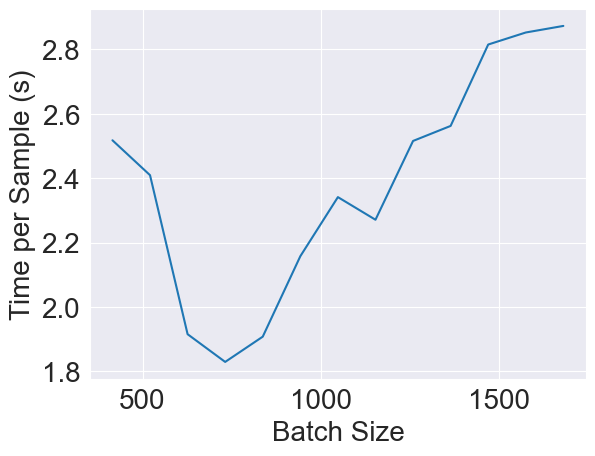

In [40]:
fig, ax = plt.subplots()
ax.plot(batch_sizes[3:16], times[3:16])
ax.set_xlabel("Batch Size")
ax.set_ylabel("Time per Sample (s)")
plt.rcParams.update({'font.size': 20})

In [75]:
N = 20
n_iters=100
samples = np.zeros((N,d))
trueSamples = np.zeros((N,d))
diffs = np.zeros((N, n_iters))
errors = np.zeros((N, n_iters))

for i in range(N):
    samples[i], (debug) = ls_sampler.sample(rate=2e-5, threshold=0, max_iters=100, debug=True, scheduler=flat)
    diffs[i,:], errors[i,:], trueSamples[i] = debug[0], debug[1], debug[2]

Computing Epsilon...
Computing regulariser...
Computing true sample


 16%|█▌        | 16/100 [00:00<00:00, 153.54it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4574995040893553e-06, average Phi generation time = 1.56663179397583e-05, average compute time = 5.950729846954346e-05
INFO: error = 0.24291670426598197


100%|██████████| 100/100 [00:00<00:00, 174.63it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 17%|█▋        | 17/100 [00:00<00:00, 163.81it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4837017059326173e-06, average Phi generation time = 1.5427160263061522e-05, average compute time = 3.911614418029785e-05
INFO: error = 0.2487505244972868


100%|██████████| 100/100 [00:00<00:00, 164.56it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 16%|█▌        | 16/100 [00:00<00:00, 155.70it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.432084083557129e-06, average Phi generation time = 1.5690088272094726e-05, average compute time = 4.239497184753418e-05
INFO: error = 0.2587964015307068


100%|██████████| 100/100 [00:00<00:00, 165.11it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 17%|█▋        | 17/100 [00:00<00:00, 164.28it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.3981332778930665e-06, average Phi generation time = 1.5881872177124023e-05, average compute time = 4.198398590087891e-05
INFO: error = 0.2564092155228211


100%|██████████| 100/100 [00:00<00:00, 157.82it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 12%|█▏        | 12/100 [00:00<00:00, 112.69it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.404451370239258e-06, average Phi generation time = 1.495676040649414e-05, average compute time = 4.600934982299805e-05
INFO: error = 0.2454183259773887


100%|██████████| 100/100 [00:00<00:00, 126.11it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 17%|█▋        | 17/100 [00:00<00:00, 168.39it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.531838417053223e-06, average Phi generation time = 1.8695354461669922e-05, average compute time = 5.8020281791687014e-05
INFO: error = 0.23337342704428374


100%|██████████| 100/100 [00:00<00:00, 111.22it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 19%|█▉        | 19/100 [00:00<00:00, 181.03it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.571392059326172e-06, average Phi generation time = 1.9652962684631346e-05, average compute time = 6.639077663421631e-05
INFO: error = 0.24102170556951408


100%|██████████| 100/100 [00:00<00:00, 180.57it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


  8%|▊         | 8/100 [00:00<00:01, 74.35it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4608373641967774e-06, average Phi generation time = 1.5056109428405762e-05, average compute time = 3.7635016441345215e-05
INFO: error = 0.2420665737733097


100%|██████████| 100/100 [00:00<00:00, 126.36it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 10%|█         | 10/100 [00:00<00:00, 91.74it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.485966682434082e-06, average Phi generation time = 1.6795492172241212e-05, average compute time = 5.938854217529297e-05
INFO: error = 0.24239823212457642


100%|██████████| 100/100 [00:00<00:00, 127.31it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 17%|█▋        | 17/100 [00:00<00:00, 157.95it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4200201034545898e-06, average Phi generation time = 1.6530466079711913e-05, average compute time = 5.912387371063232e-05
INFO: error = 0.25985219857740016


100%|██████████| 100/100 [00:00<00:00, 152.44it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 36%|███▌      | 36/100 [00:00<00:00, 355.15it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4280548095703123e-06, average Phi generation time = 1.6178250312805175e-05, average compute time = 4.636726379394531e-05
INFO: error = 0.263552845092246


100%|██████████| 100/100 [00:00<00:00, 294.79it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 23%|██▎       | 23/100 [00:00<00:00, 228.55it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4982213973999025e-06, average Phi generation time = 1.265106201171875e-05, average compute time = 1.9245004653930662e-05
INFO: error = 0.26772703761485706


100%|██████████| 100/100 [00:00<00:00, 247.10it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 18%|█▊        | 18/100 [00:00<00:00, 177.81it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.797269821166992e-06, average Phi generation time = 1.3107109069824219e-05, average compute time = 2.428121566772461e-05
INFO: error = 0.23057174745430464


100%|██████████| 100/100 [00:00<00:00, 201.62it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 33%|███▎      | 33/100 [00:00<00:00, 322.23it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4205684661865233e-06, average Phi generation time = 1.2378525733947754e-05, average compute time = 3.4429931640625e-05
INFO: error = 0.24782468603956231


100%|██████████| 100/100 [00:00<00:00, 250.51it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 19%|█▉        | 19/100 [00:00<00:00, 184.32it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4413347244262693e-06, average Phi generation time = 1.236891746520996e-05, average compute time = 2.640082836151123e-05
INFO: error = 0.2648695643030348


100%|██████████| 100/100 [00:00<00:00, 240.64it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 21%|██        | 21/100 [00:00<00:00, 206.69it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.435922622680664e-06, average Phi generation time = 1.2315630912780763e-05, average compute time = 2.7724575996398927e-05
INFO: error = 0.27966326199825736


100%|██████████| 100/100 [00:00<00:00, 173.90it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 33%|███▎      | 33/100 [00:00<00:00, 326.44it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.493596076965332e-06, average Phi generation time = 1.3450717926025391e-05, average compute time = 4.069983959197998e-05
INFO: error = 0.2535443507993486


100%|██████████| 100/100 [00:00<00:00, 224.27it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 24%|██▍       | 24/100 [00:00<00:00, 218.95it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.4535655975341798e-06, average Phi generation time = 1.251964569091797e-05, average compute time = 2.9552364349365234e-05
INFO: error = 0.2539672748629243


100%|██████████| 100/100 [00:00<00:00, 249.98it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 16%|█▌        | 16/100 [00:00<00:00, 158.82it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.526235580444336e-06, average Phi generation time = 1.4791393280029297e-05, average compute time = 2.2377848625183105e-05
INFO: error = 0.25282916761750096


100%|██████████| 100/100 [00:00<00:00, 234.34it/s]


Computing Epsilon...
Computing regulariser...
Computing true sample


 26%|██▌       | 26/100 [00:00<00:00, 255.89it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 2e-05
INFO: average gradient time = 0.0
INFO: average subsample time = 2.439522743225098e-06, average Phi generation time = 1.235494613647461e-05, average compute time = 2.756197452545166e-05
INFO: error = 0.26784543099222624


100%|██████████| 100/100 [00:00<00:00, 214.63it/s]


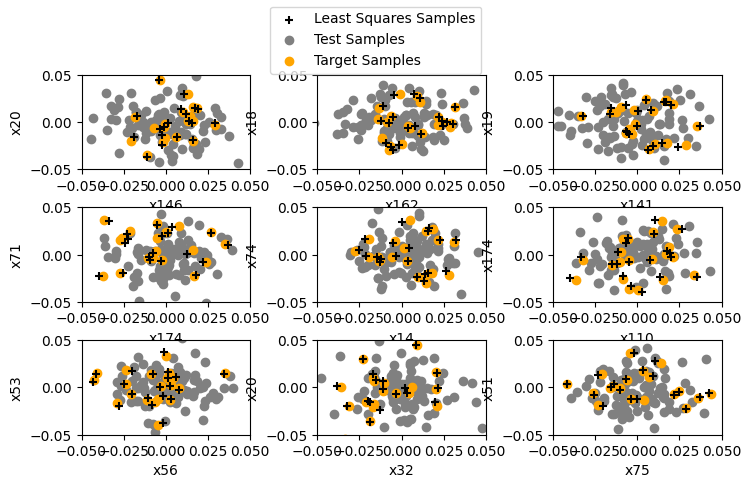

In [76]:
test_samples = np.random.multivariate_normal(np.zeros(d), ld_model.Hinv, size=100)
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d)
            b = np.random.randint(0, d)
            if a != b: 
                ax[i][j].scatter(samples[:,a], samples[:,b], color='Black', marker='+', label="Least Squares Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                ax[i][j].scatter(trueSamples[:,a], trueSamples[:,b], c='Orange', zorder=-1, label="Target Samples")
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
                ax[i][j].set_xlim(-0.05,0.05)
                ax[i][j].set_ylim(-0.05,0.05)
handles, labels = ax[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)